DATA CLEANING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("WDICSV.csv")
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,27.6,28.8,30.3,31.4,32.6,33.8,34.9,36.1,NaN,NaN
1,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.4,12.6,13.5,14.5,15.6,16.4,17.4,18.5,NaN,NaN
2,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,79.5,80.5,81.6,82.6,83.2,83.8,84.5,85.0,NaN,NaN
3,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,71.5,97.7,97.7,93.4,97.7,97.7,97.7,85.3,85.3,NaN
4,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,64.6,97.1,97.1,91.6,97.1,97.1,97.1,81.7,81.4,NaN


In [3]:
print(df.info(),df.shape,df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401394 entries, 0 to 401393
Data columns (total 69 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    401394 non-null  object 
 1   Country Code    401394 non-null  object 
 2   Indicator Name  401394 non-null  object 
 3   Indicator Code  401394 non-null  object 
 4   1960            37544 non-null   float64
 5   1961            42646 non-null   float64
 6   1962            43967 non-null   float64
 7   1963            44913 non-null   float64
 8   1964            45417 non-null   float64
 9   1965            47494 non-null   float64
 10  1966            47518 non-null   float64
 11  1967            48157 non-null   float64
 12  1968            48761 non-null   float64
 13  1969            49550 non-null   float64
 14  1970            73318 non-null   float64
 15  1971            77829 non-null   float64
 16  1972            79589 non-null   float64
 17  1973      

In [4]:
df = df.drop(columns=['Country Code', 'Indicator Code'])

In [5]:
years = [str(year) for year in range(2000, 2021)]

cols_to_keep = ['Country Name', 'Indicator Name'] + years
df = df[cols_to_keep]
df.head()

,Country Name,Indicator Name,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Access to clean fuels and technologies for coo...,5.5,6.6,7.7,9.00,10.5,11.9,13.5,15.1,...,21.3,22.9,24.5,26.1,27.6,28.8,30.3,31.4,32.6,33.8
1,Afghanistan,Access to clean fuels and technologies for coo...,0.8,1.0,1.3,1.60,1.9,2.4,3.0,3.6,...,7.0,8.0,9.0,10.2,11.4,12.6,13.5,14.5,15.6,16.4
2,Afghanistan,Access to clean fuels and technologies for coo...,25.3,29.9,35.1,40.25,45.3,50.2,54.7,59.2,...,72.0,74.3,76.1,78.0,79.5,80.5,81.6,82.6,83.2,83.8
3,Afghanistan,Access to electricity (% of population),4.4,9.3,14.1,19.00,23.8,28.7,33.5,38.4,...,43.2,69.1,68.0,89.5,71.5,97.7,97.7,93.4,97.7,97.7
4,Afghanistan,"Access to electricity, rural (% of rural popul...",NaN,NaN,NaN,2.10,7.8,15.4,19.3,25.0,...,29.6,60.8,60.2,86.5,64.6,97.1,97.1,91.6,97.1,97.1


In [6]:
df.dropna(subset=years, how='all', inplace=True)

In [7]:
df_long = df.melt(id_vars=['Country Name', 'Indicator Name'], 
                  value_vars=years, 
                  var_name='Year', value_name='Value')

df_long['Year'] = df_long['Year'].astype(int)
df_long.head()

,Country Name,Indicator Name,Year,Value
0,Afghanistan,Access to clean fuels and technologies for coo...,2000,5.5
1,Afghanistan,Access to clean fuels and technologies for coo...,2000,0.8
2,Afghanistan,Access to clean fuels and technologies for coo...,2000,25.3
3,Afghanistan,Access to electricity (% of population),2000,4.4
4,Afghanistan,"Access to electricity, rural (% of rural popul...",2000,NaN


In [8]:
missing_percent = df_long['Value'].isnull().mean() * 100
print(f"Overall missing %: {missing_percent:.2f}")

Overall missing %: 24.03


In [9]:
df_long['Value'] = df_long.groupby(['Country Name', 'Indicator Name'])['Value'].ffill()
df_long['Value'] = df_long.groupby(['Country Name', 'Indicator Name'])['Value'].bfill()

In [10]:
neighbor_countries = [
    'India', 'Pakistan', 'Bangladesh', 'Nepal', 'Bhutan',
    'Sri Lanka', 'Afghanistan', 'Myanmar', 'China'
]

df_region = df_long[df_long['Country Name'].isin(neighbor_countries)].copy()

df_region.reset_index(drop=True, inplace=True)

df_region.head()

,Country Name,Indicator Name,Year,Value
0,Afghanistan,Access to clean fuels and technologies for coo...,2000,5.5
1,Afghanistan,Access to clean fuels and technologies for coo...,2000,0.8
2,Afghanistan,Access to clean fuels and technologies for coo...,2000,25.3
3,Afghanistan,Access to electricity (% of population),2000,4.4
4,Afghanistan,"Access to electricity, rural (% of rural popul...",2000,2.1


EDA

In [11]:
df_region.describe(include='all')

,Country Name,Indicator Name,Year,Value
count,248493,248493,248493.000000,2.484930e+05
unique,9,1438,NaN,NaN
top,Bangladesh,Women's share of population ages 15+ living wi...,NaN,NaN
freq,29337,189,NaN,NaN
mean,NaN,NaN,2010.000000,4.059879e+11
std,NaN,NaN,6.055313,4.771934e+12
min,NaN,NaN,2000.000000,-7.108760e+12
25%,NaN,NaN,2005.000000,5.000000e+00
50%,NaN,NaN,2010.000000,3.276981e+01
75%,NaN,NaN,2015.000000,3.940500e+02


In [12]:
print(df_region['Country Name'].value_counts())
print(df_region['Indicator Name'].value_counts())

Country Name
Bangladesh     29337
India          29064
Pakistan       28980
Sri Lanka      28749
Nepal          28245
Bhutan         26565
Myanmar        26313
Afghanistan    25872
China          25368
Name: count, dtype: int64
Indicator Name
Women's share of population ages 15+ living with HIV (%)                                                189
Women who were first married by age 18 (% of women ages 20-24)                                          189
Women who were first married by age 15 (% of women ages 20-24)                                          189
Women Business and the Law Index Score (scale 1-100)                                                    189
Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)        189
                                                                                                       ... 
Benefit incidence of unemployment benefits and ALMP to poorest quintile (% of total U/ALMP benefits)     21
N

In [13]:
selected_indicators = [
    'GDP per capita (current US$)',
    'Life expectancy at birth, total (years)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Unemployment, total (% of total labor force)',
    'Health expenditure, total (% of GDP)',
    'Inflation, consumer prices (annual %)',
    'Government expenditure on education, total (% of GDP)',
    'Access to electricity (% of population)',
    'Exports of goods and services (% of GDP)',
    'Imports of goods and services (% of GDP)',
    'Population growth (annual %)'
]

df_final = df_region[df_region['Indicator Name'].isin(selected_indicators)].copy()

df_final.reset_index(drop=True, inplace=True)

df_final.head()

,Country Name,Indicator Name,Year,Value
0,Afghanistan,Access to electricity (% of population),2000,4.400000
1,Afghanistan,Exports of goods and services (% of GDP),2000,10.420817
2,Afghanistan,GDP per capita (current US$),2000,174.930991
3,Afghanistan,"Government expenditure on education, total (% ...",2000,4.684761
4,Afghanistan,Imports of goods and services (% of GDP),2000,36.289077


In [14]:
df_final['Indicator Name'].value_counts()

Indicator Name
Access to electricity (% of population)                       189
GDP per capita (current US$)                                  189
Government expenditure on education, total (% of GDP)         189
Life expectancy at birth, total (years)                       189
Inflation, consumer prices (annual %)                         189
Literacy rate, adult total (% of people ages 15 and above)    189
Population growth (annual %)                                  189
Imports of goods and services (% of GDP)                      168
Exports of goods and services (% of GDP)                      168
Name: count, dtype: int64

In [15]:
df_final.groupby('Indicator Name')['Value'].describe()

,count,mean,std,min,25%,50%,75%,max
Indicator Name,,,,,,,,
Access to electricity (% of population),189.0,72.520106,22.920285,4.400000,55.300000,76.300000,92.700000,100.000000
Exports of goods and services (% of GDP),168.0,19.234575,9.463203,6.805290,11.182857,18.134559,24.401237,52.357127
GDP per capita (current US$),189.0,1665.607402,1882.564215,138.706822,585.278492,1067.043246,1907.042516,10408.719550
"Government expenditure on education, total (% of GDP)",189.0,3.086575,1.372497,0.787440,2.052680,3.142850,4.129804,6.764200
Imports of goods and services (% of GDP),168.0,29.964000,12.148356,11.830343,19.963031,27.820775,36.289077,65.623621
"Inflation, consumer prices (annual %)",189.0,7.031751,6.559169,-6.811161,3.528394,5.691075,8.825067,57.074511
"Life expectancy at birth, total (years)",189.0,67.394159,5.205343,55.005000,63.591000,66.600000,71.179000,78.019000
"Literacy rate, adult total (% of people ages 15 and above)",189.0,65.824122,20.366948,31.000000,50.000000,61.000000,90.000000,97.000000
Population growth (annual %),189.0,1.366963,0.945742,0.199390,0.724433,1.078718,1.703570,6.145194


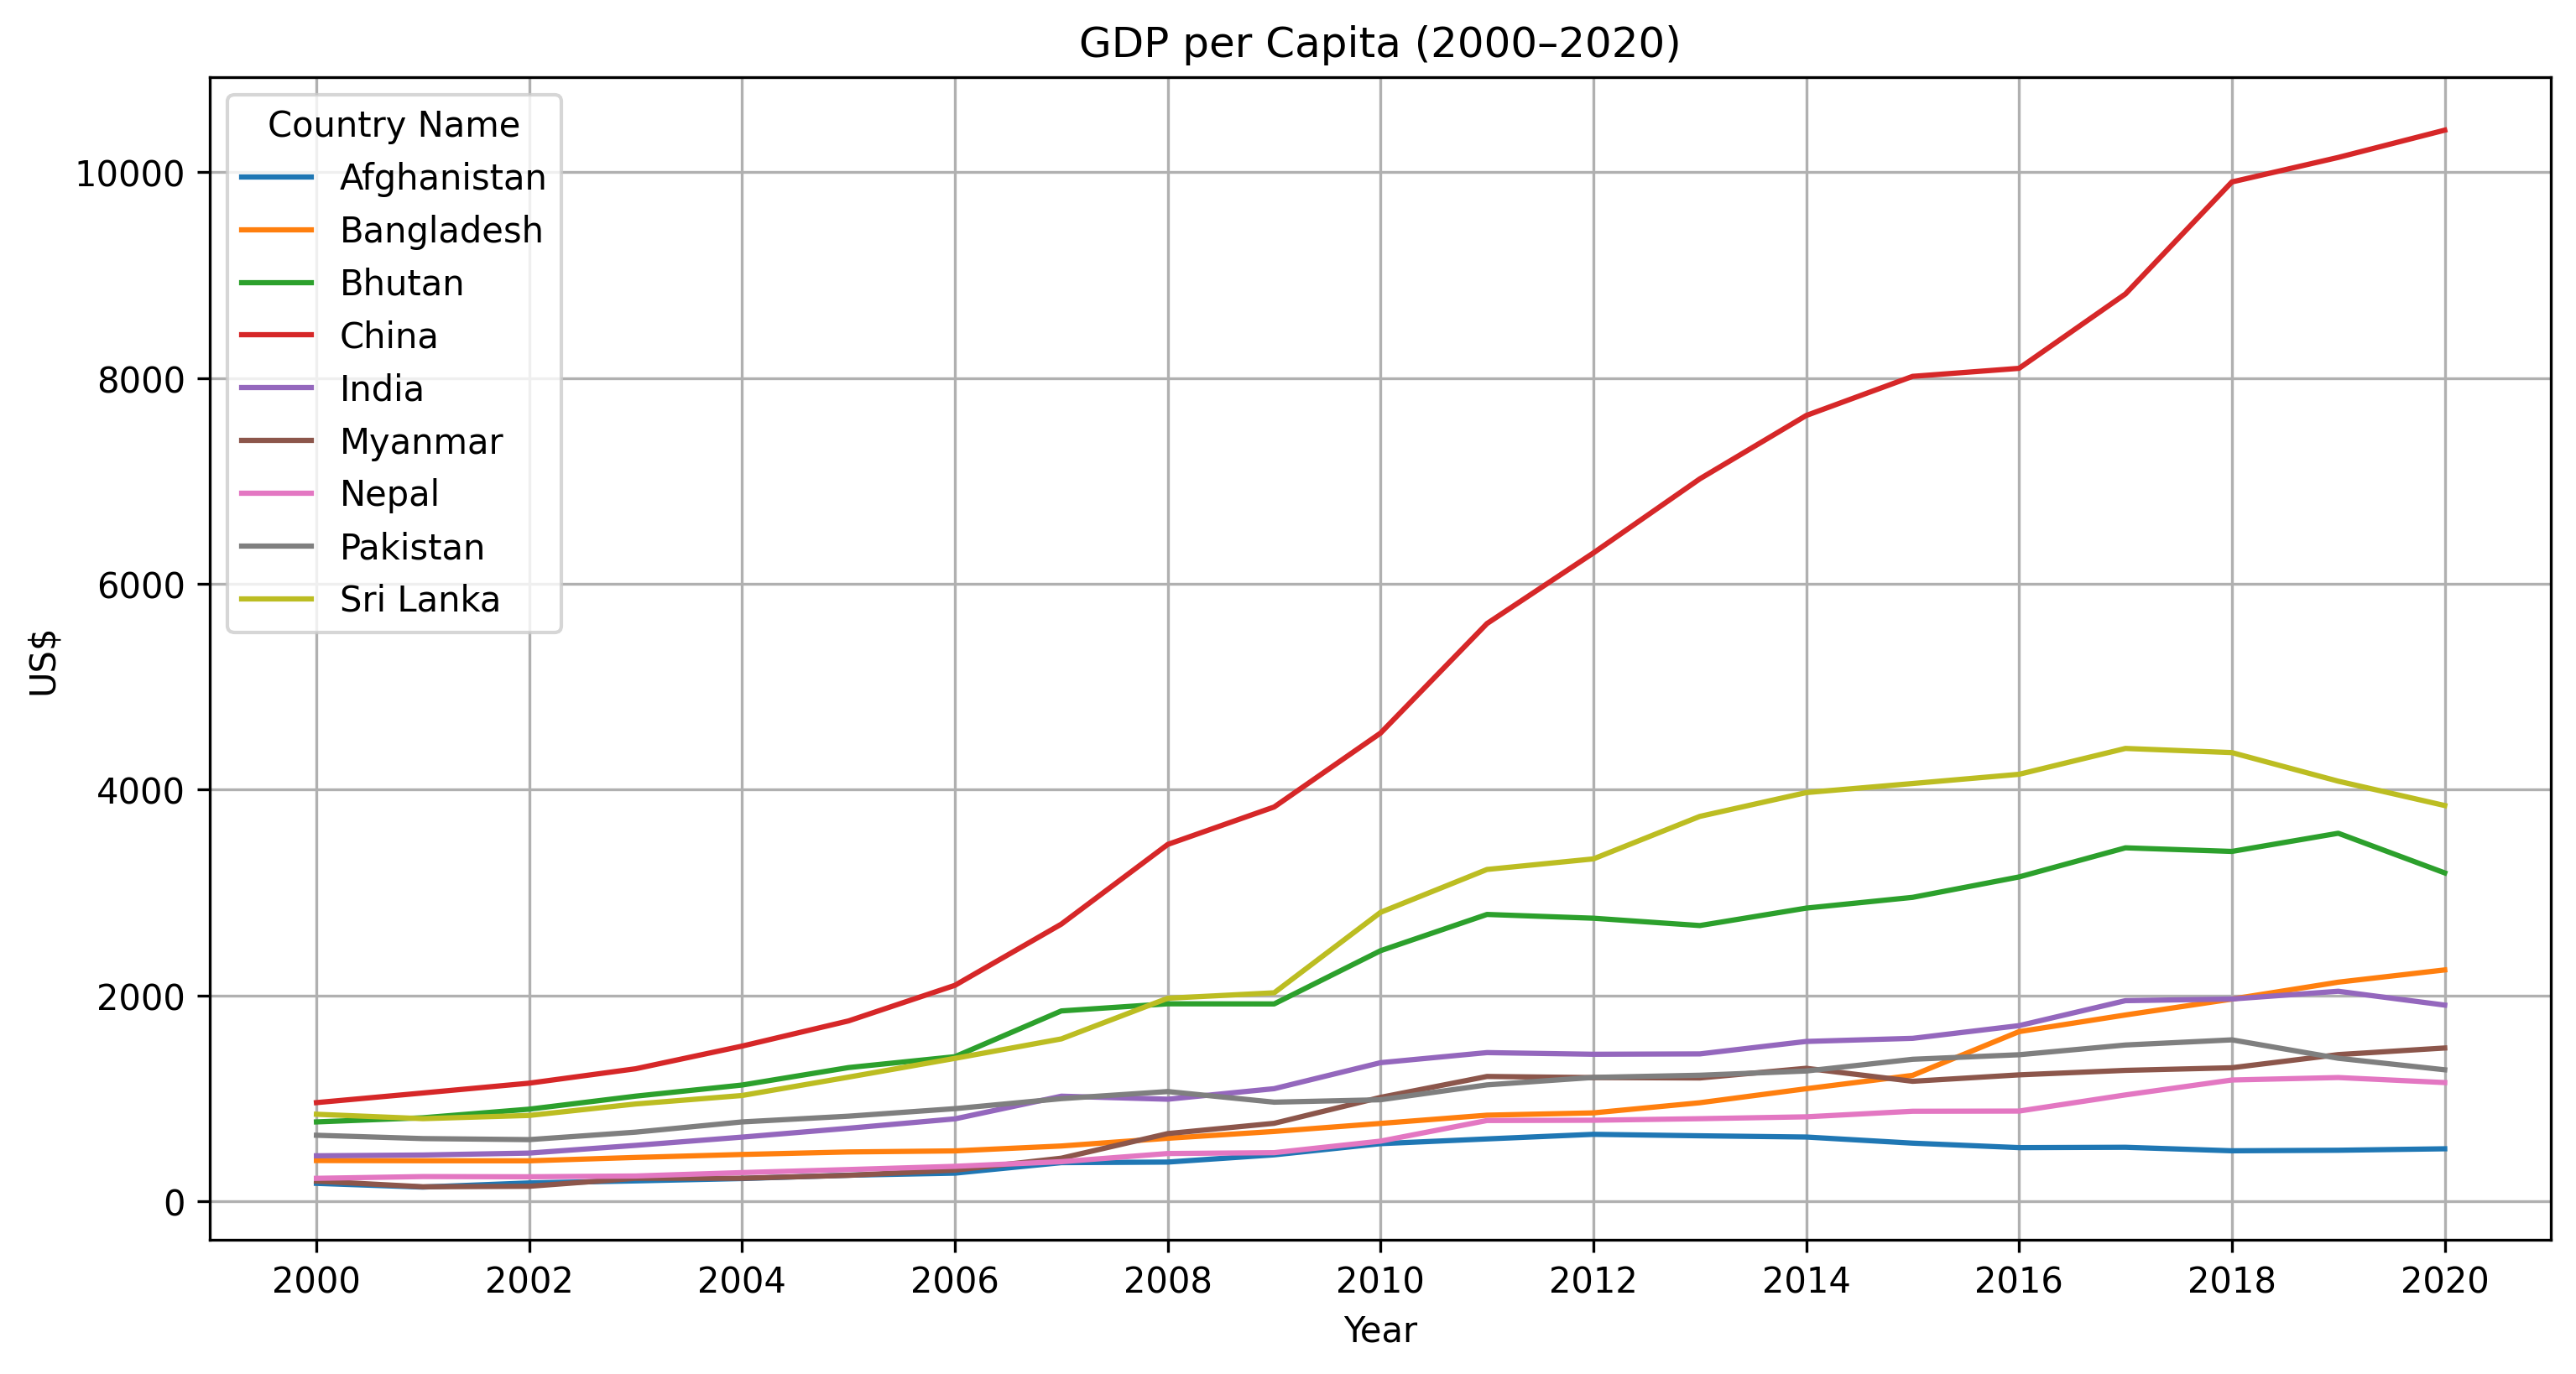

In [16]:
gdp = df_final[df_final['Indicator Name'] == 'GDP per capita (current US$)']

plt.figure(figsize=(12,6), dpi=300)
sns.lineplot(data=gdp, x='Year', y='Value', hue='Country Name')
plt.title('GDP per Capita (2000–2020)')
plt.ylabel('US$')
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020])
plt.grid(True)
plt.show()

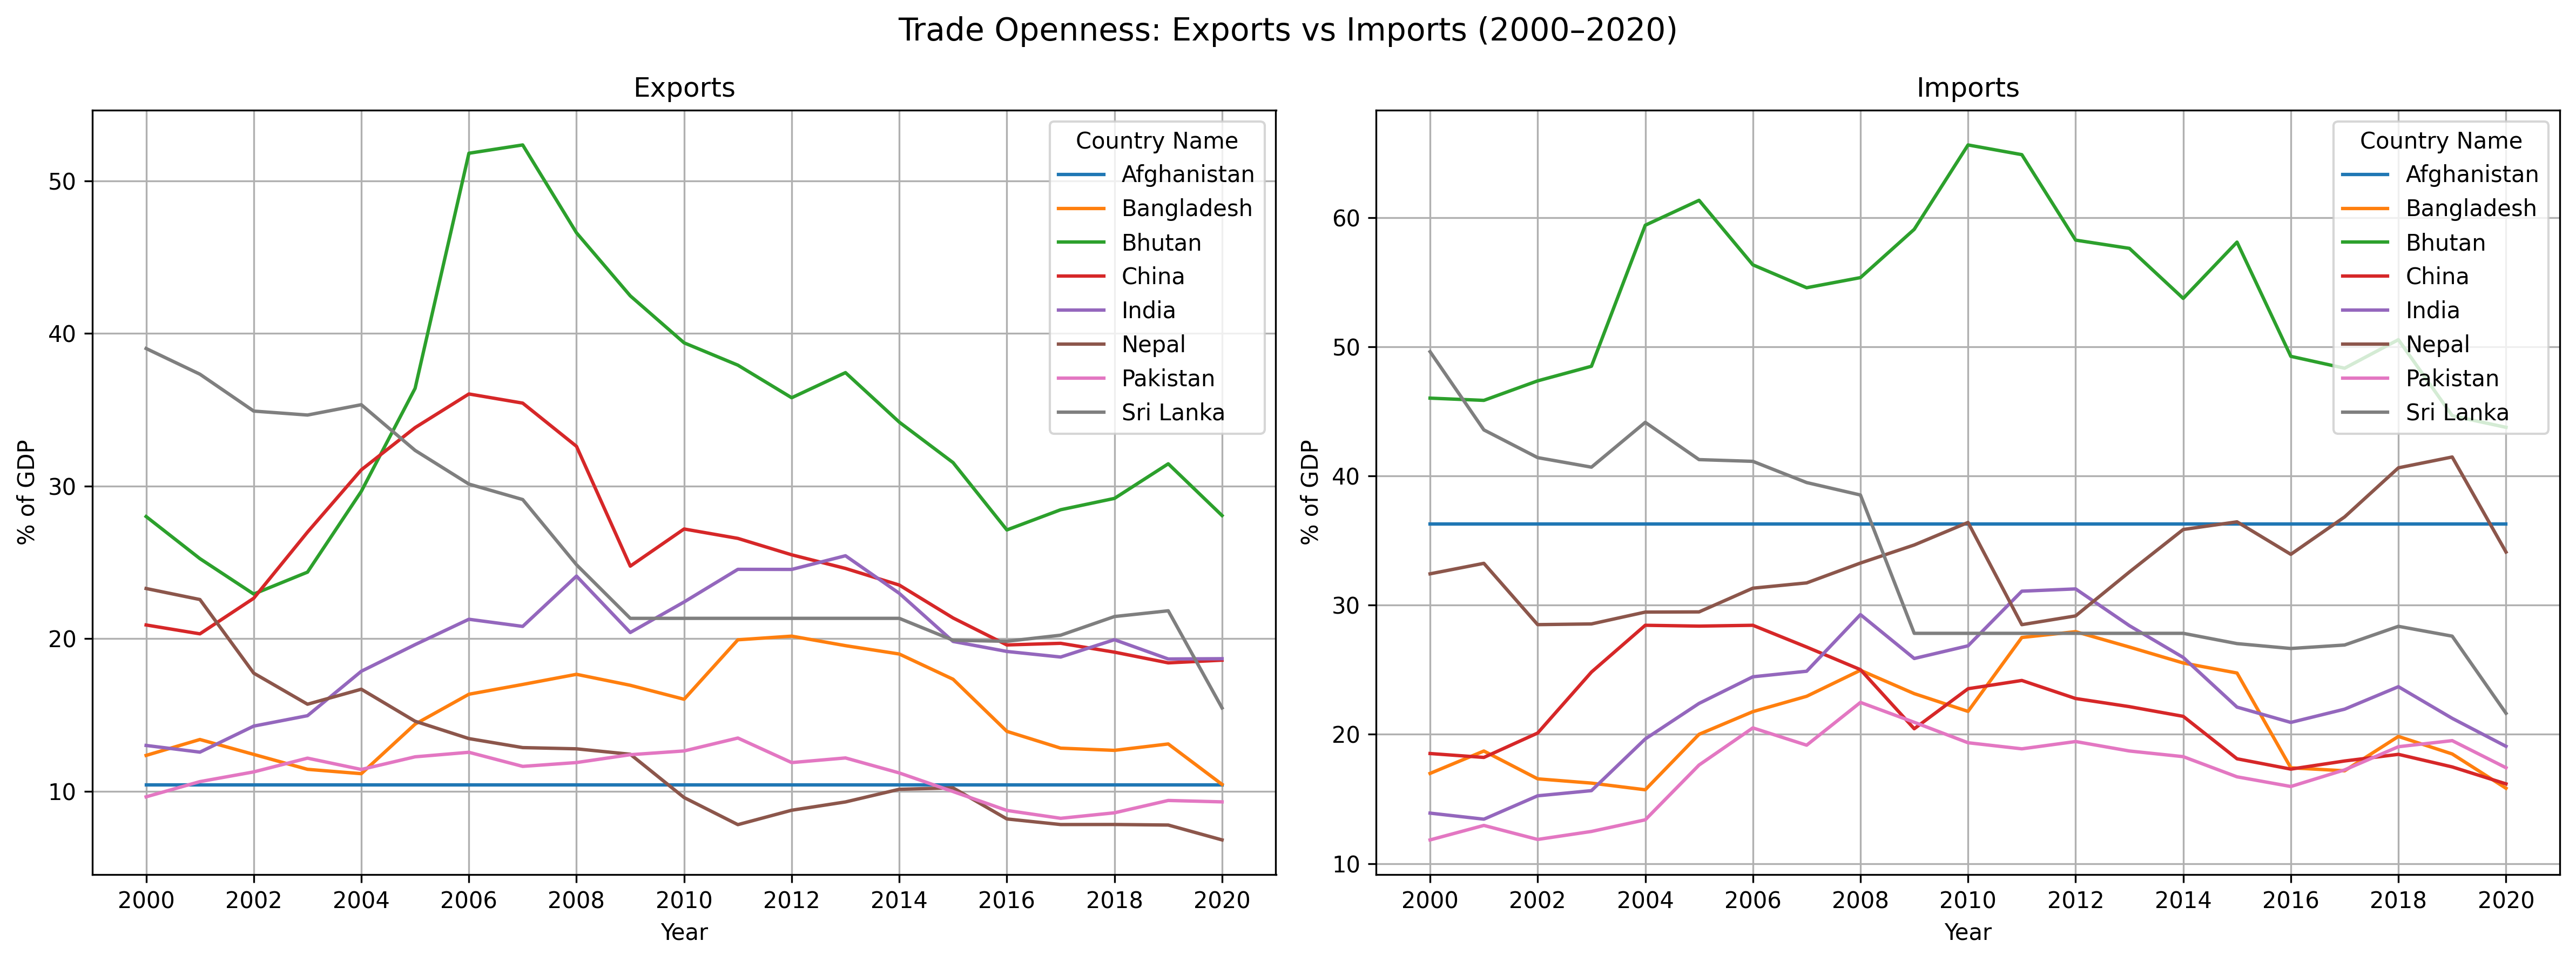

In [17]:
exports = df_final[df_final['Indicator Name'] == 'Exports of goods and services (% of GDP)']
imports = df_final[df_final['Indicator Name'] == 'Imports of goods and services (% of GDP)']

fig, ax = plt.subplots(1, 2, figsize=(16, 6), dpi=300, sharey=False)

sns.lineplot(data=exports, x='Year', y='Value', hue='Country Name', ax=ax[0])
ax[0].set_title('Exports')
ax[0].set_ylabel('% of GDP')
ax[0].set_xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020])
ax[0].grid(True)

sns.lineplot(data=imports, x='Year', y='Value', hue='Country Name', ax=ax[1])
ax[1].set_title('Imports')
ax[1].set_ylabel('% of GDP')
ax[1].set_xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020])
ax[1].legend(loc='upper right', title='Country Name')
ax[1].grid(True)

plt.suptitle('Trade Openness: Exports vs Imports (2000–2020)', fontsize=14)
plt.tight_layout()
plt.show()

In [18]:
df_final['Indicator Name'].value_counts()

Indicator Name
Access to electricity (% of population)                       189
GDP per capita (current US$)                                  189
Government expenditure on education, total (% of GDP)         189
Life expectancy at birth, total (years)                       189
Inflation, consumer prices (annual %)                         189
Literacy rate, adult total (% of people ages 15 and above)    189
Population growth (annual %)                                  189
Imports of goods and services (% of GDP)                      168
Exports of goods and services (% of GDP)                      168
Name: count, dtype: int64

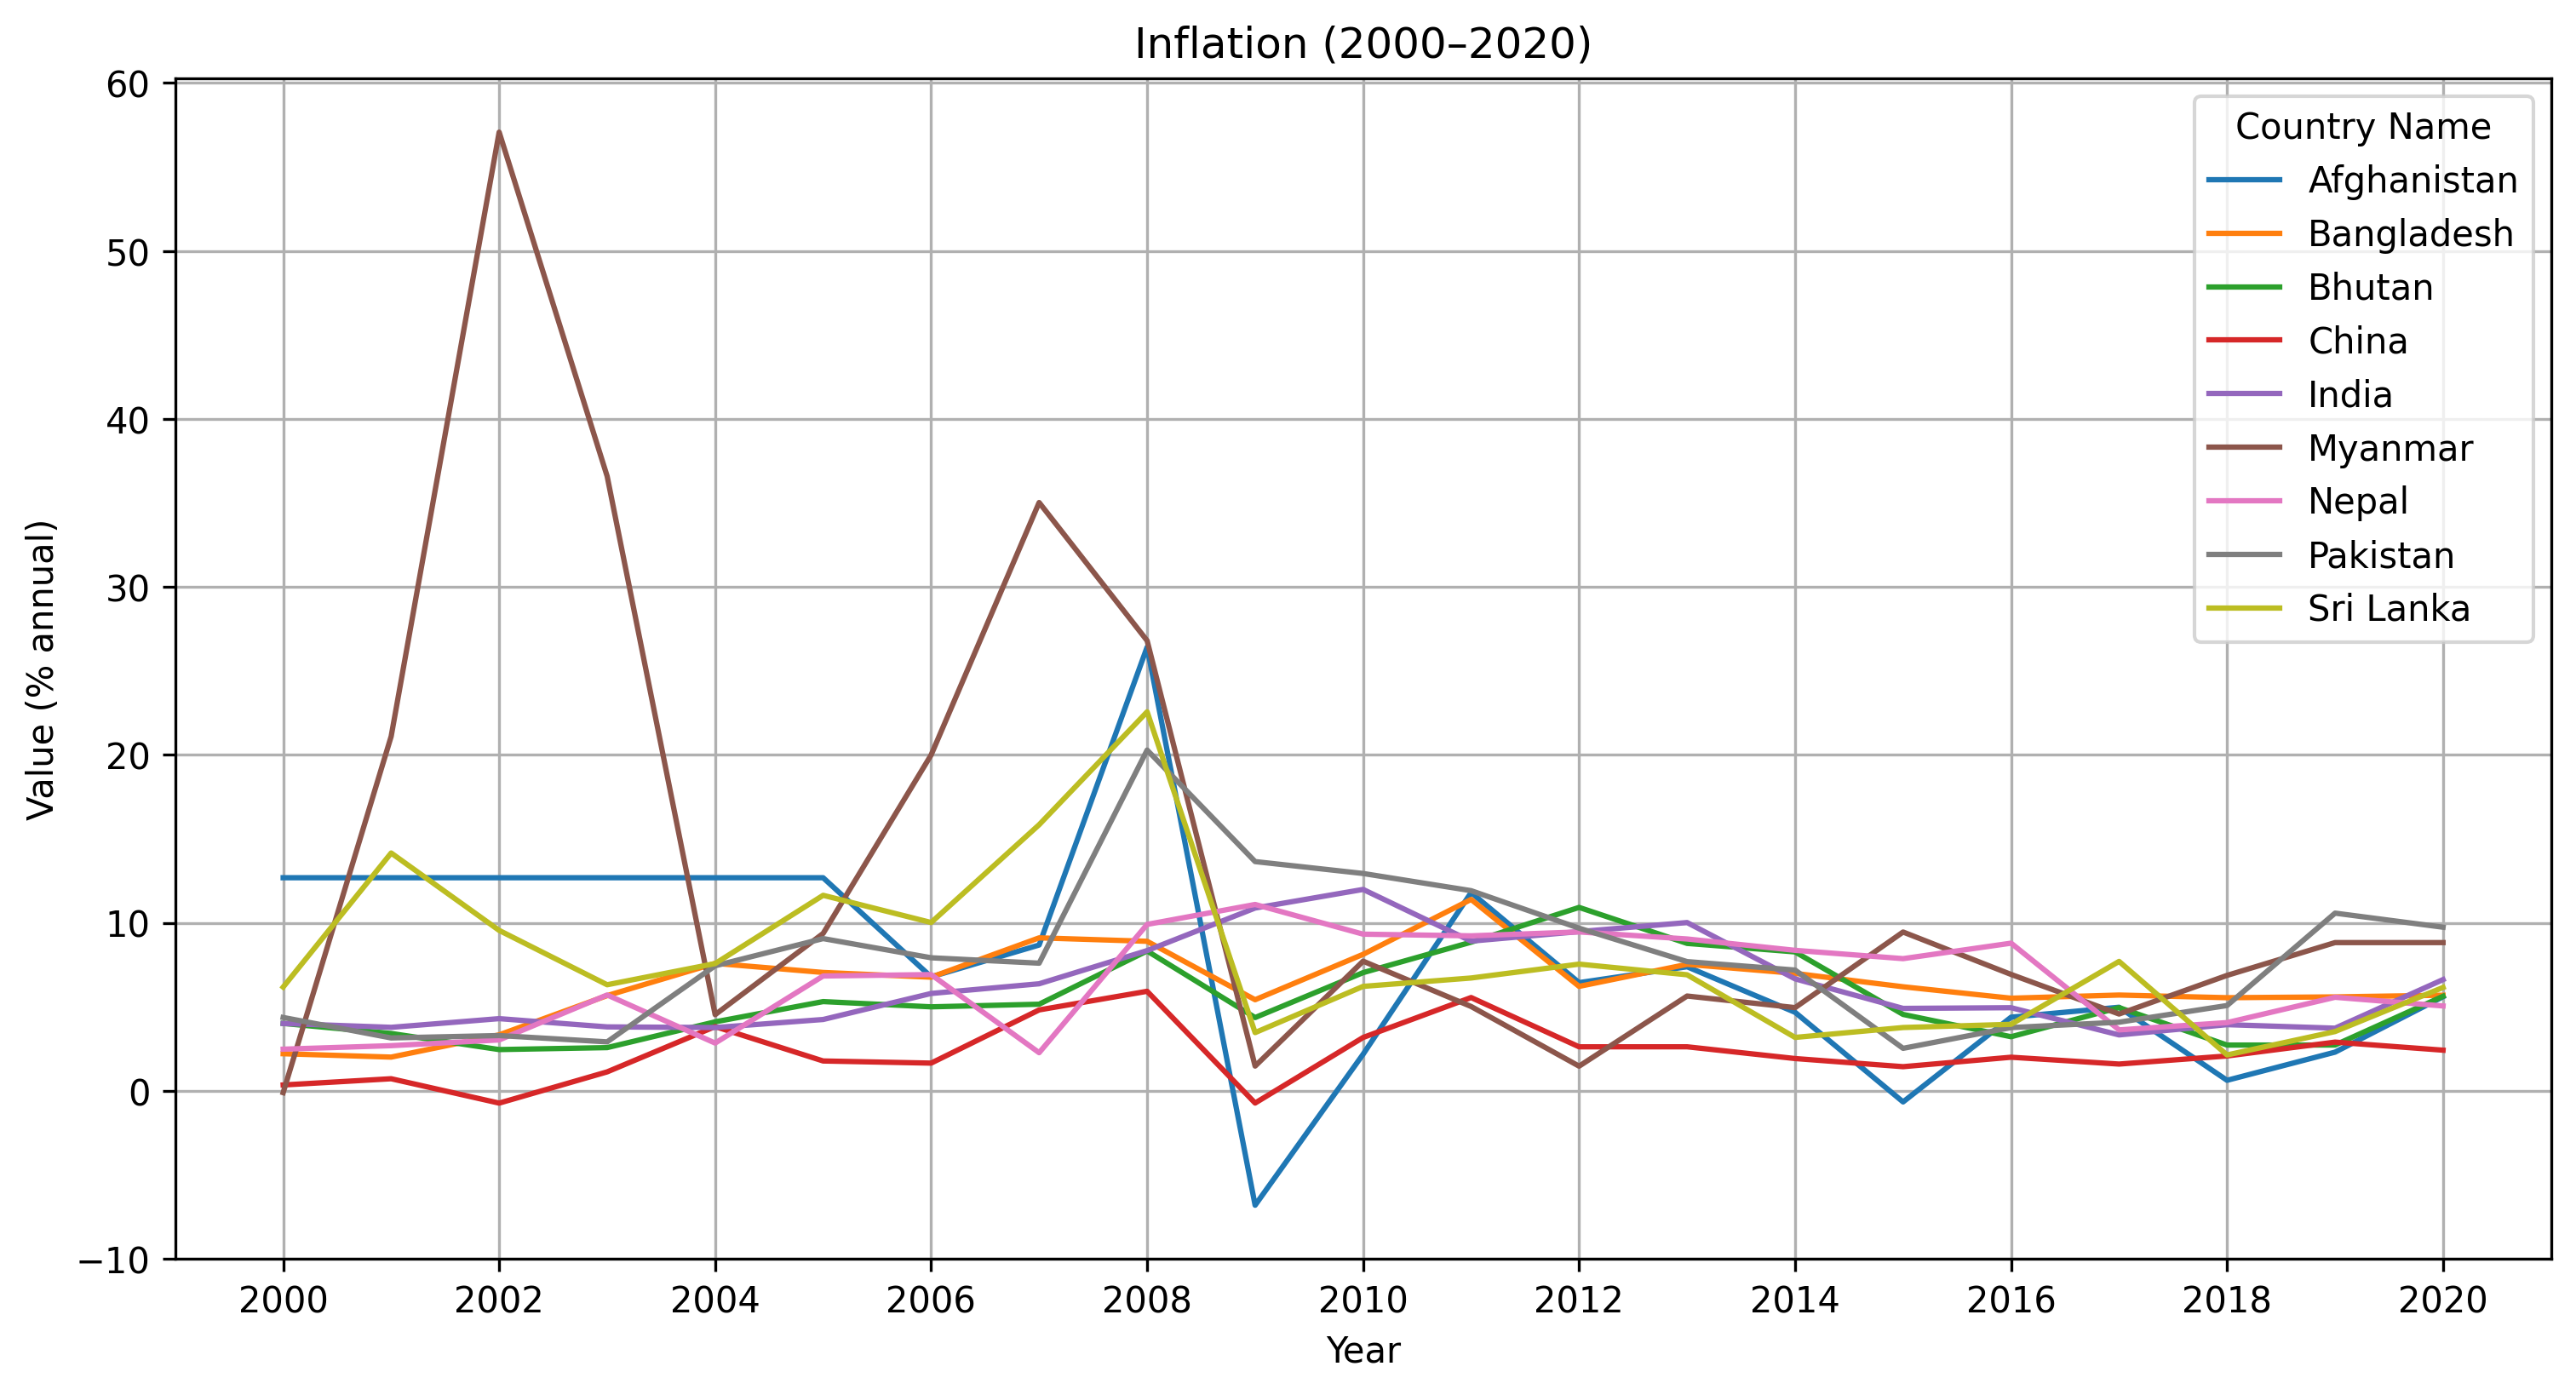

In [19]:
indicator = 'Inflation, consumer prices (annual %)'  # Change as needed
subset = df_final[df_final['Indicator Name'] == indicator]

plt.figure(figsize=(12,6), dpi=300)
sns.lineplot(data=subset, x='Year', y='Value', hue='Country Name')
plt.title('Inflation (2000–2020)')
plt.ylabel('Value (% annual)')
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020])
plt.grid(True)
plt.legend(loc='upper right', title='Country Name')
plt.show()

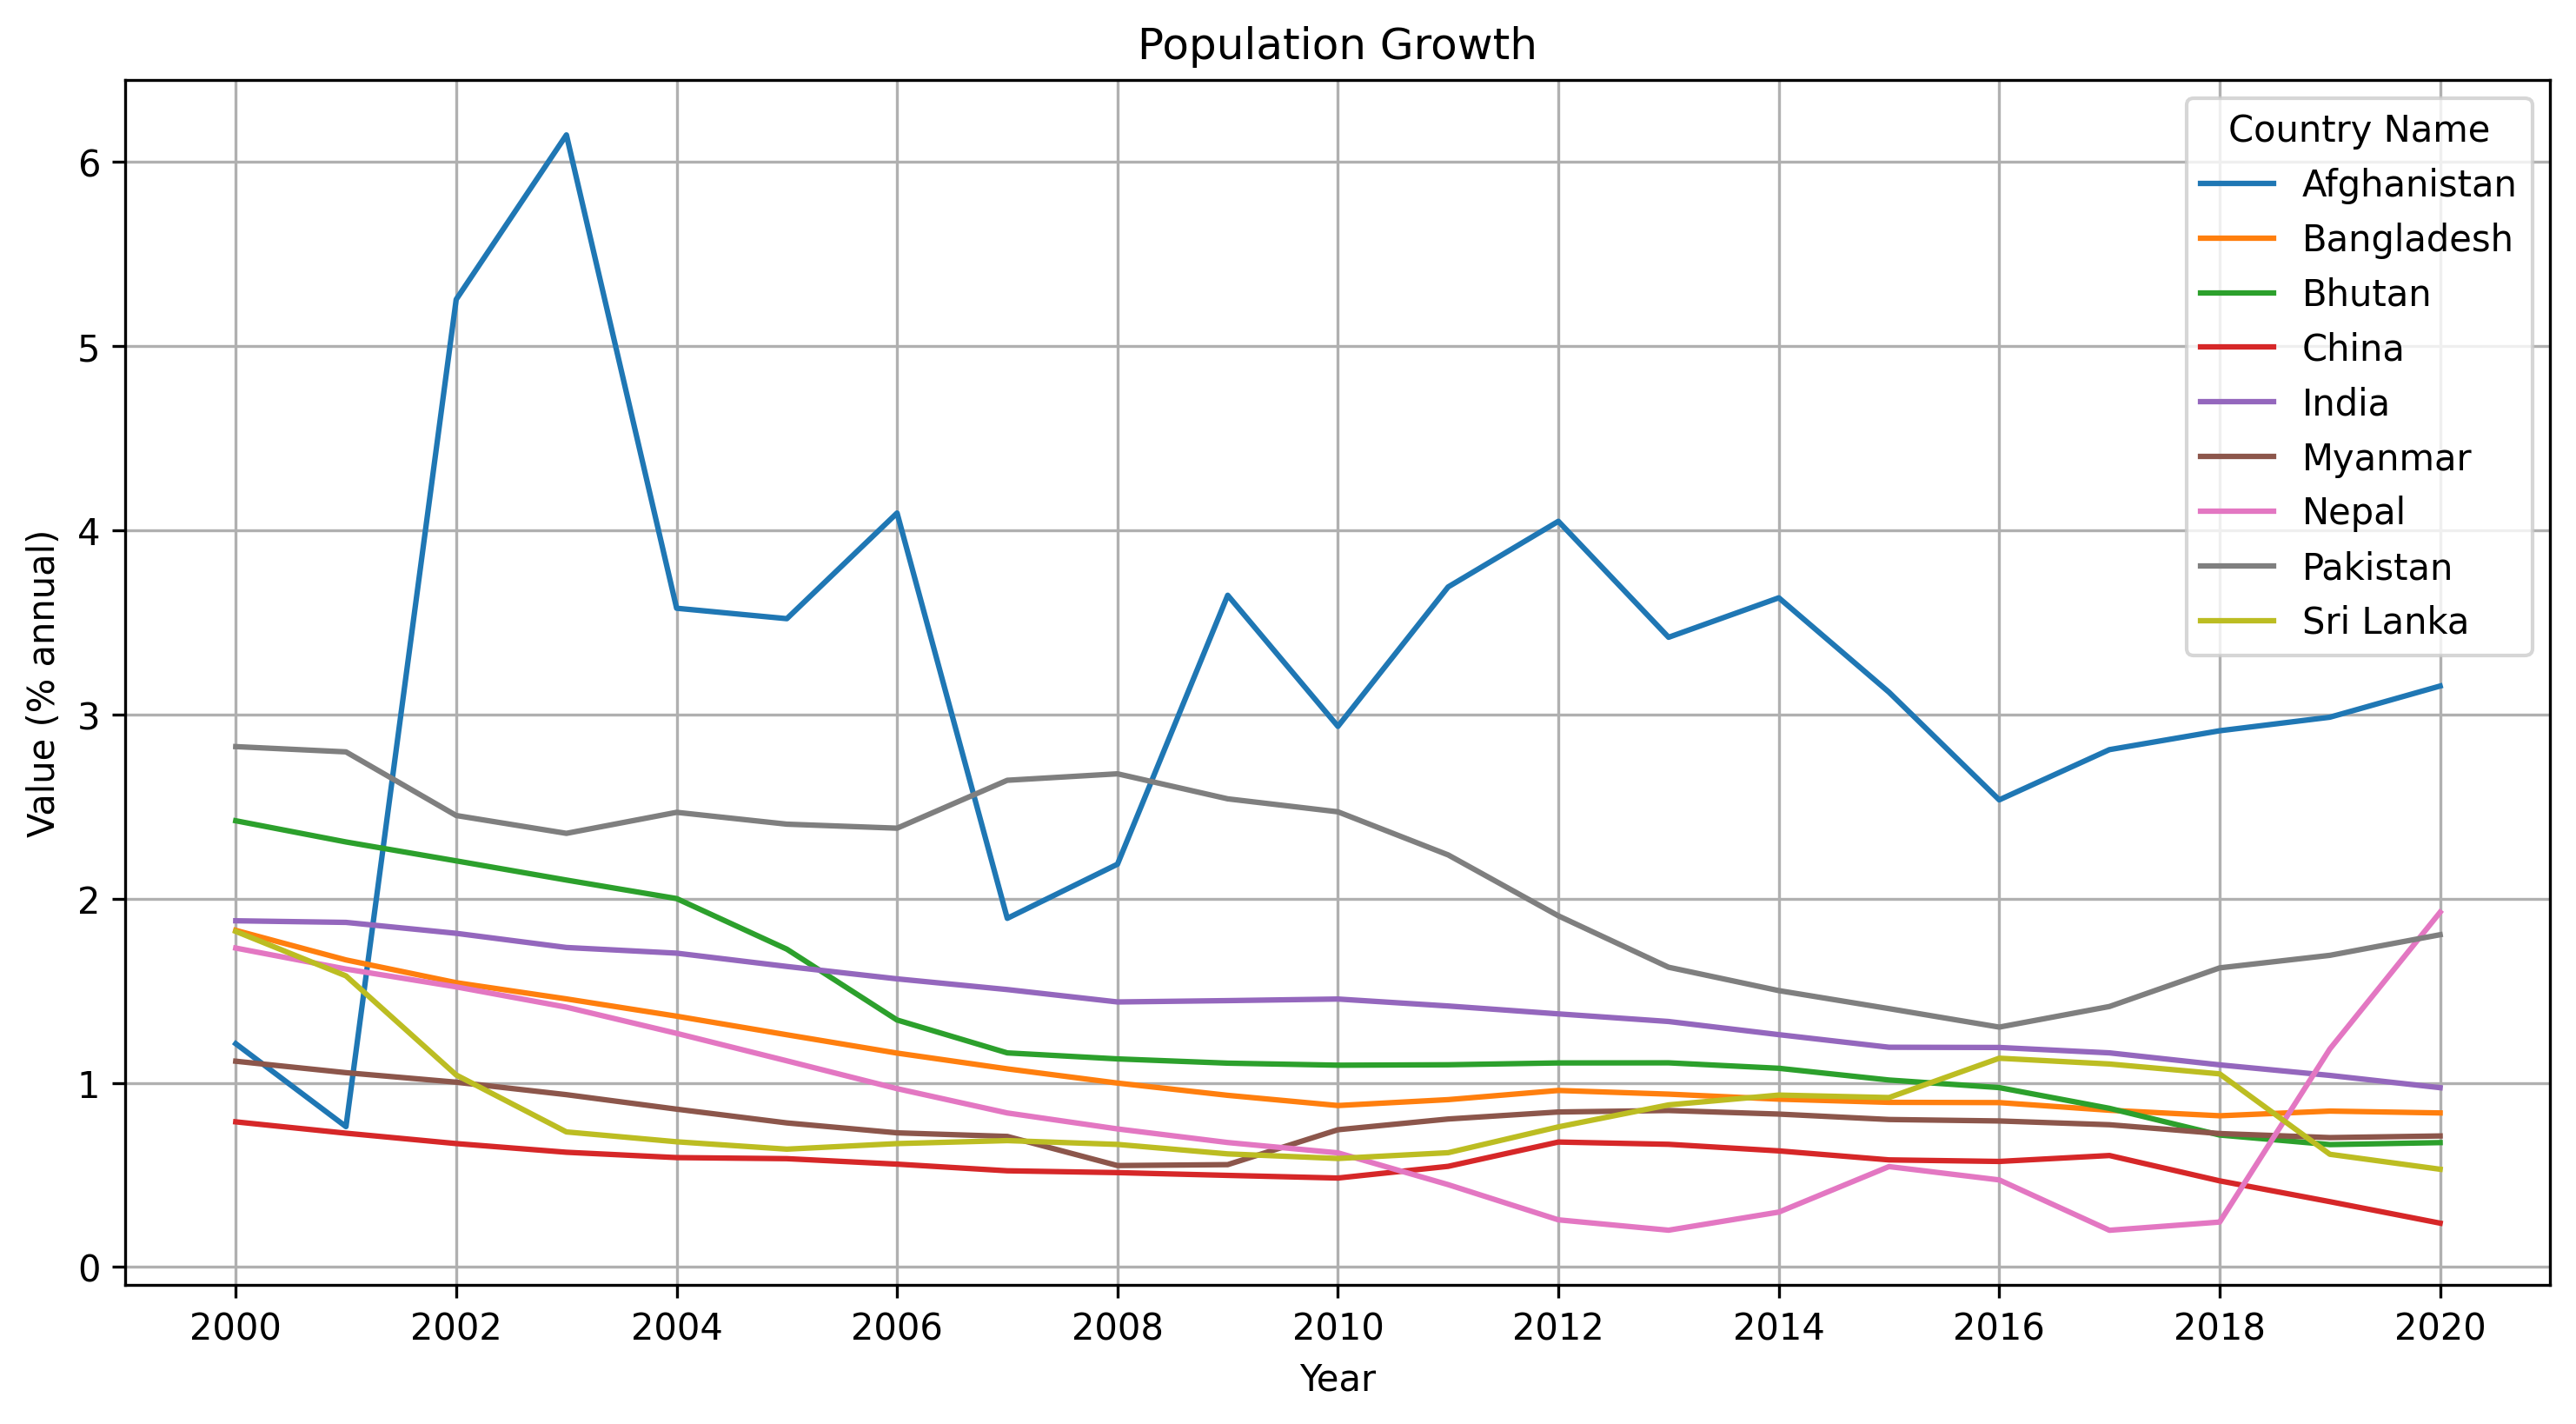

In [20]:
indicator = 'Population growth (annual %)'  # Change as needed
subset = df_final[df_final['Indicator Name'] == indicator]

plt.figure(figsize=(12,6), dpi=300)
sns.lineplot(data=subset, x='Year', y='Value', hue='Country Name')
plt.title('Population Growth')
plt.ylabel('Value (% annual)')
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020])
plt.grid(True)
plt.legend(loc='upper right', title='Country Name')
plt.show()

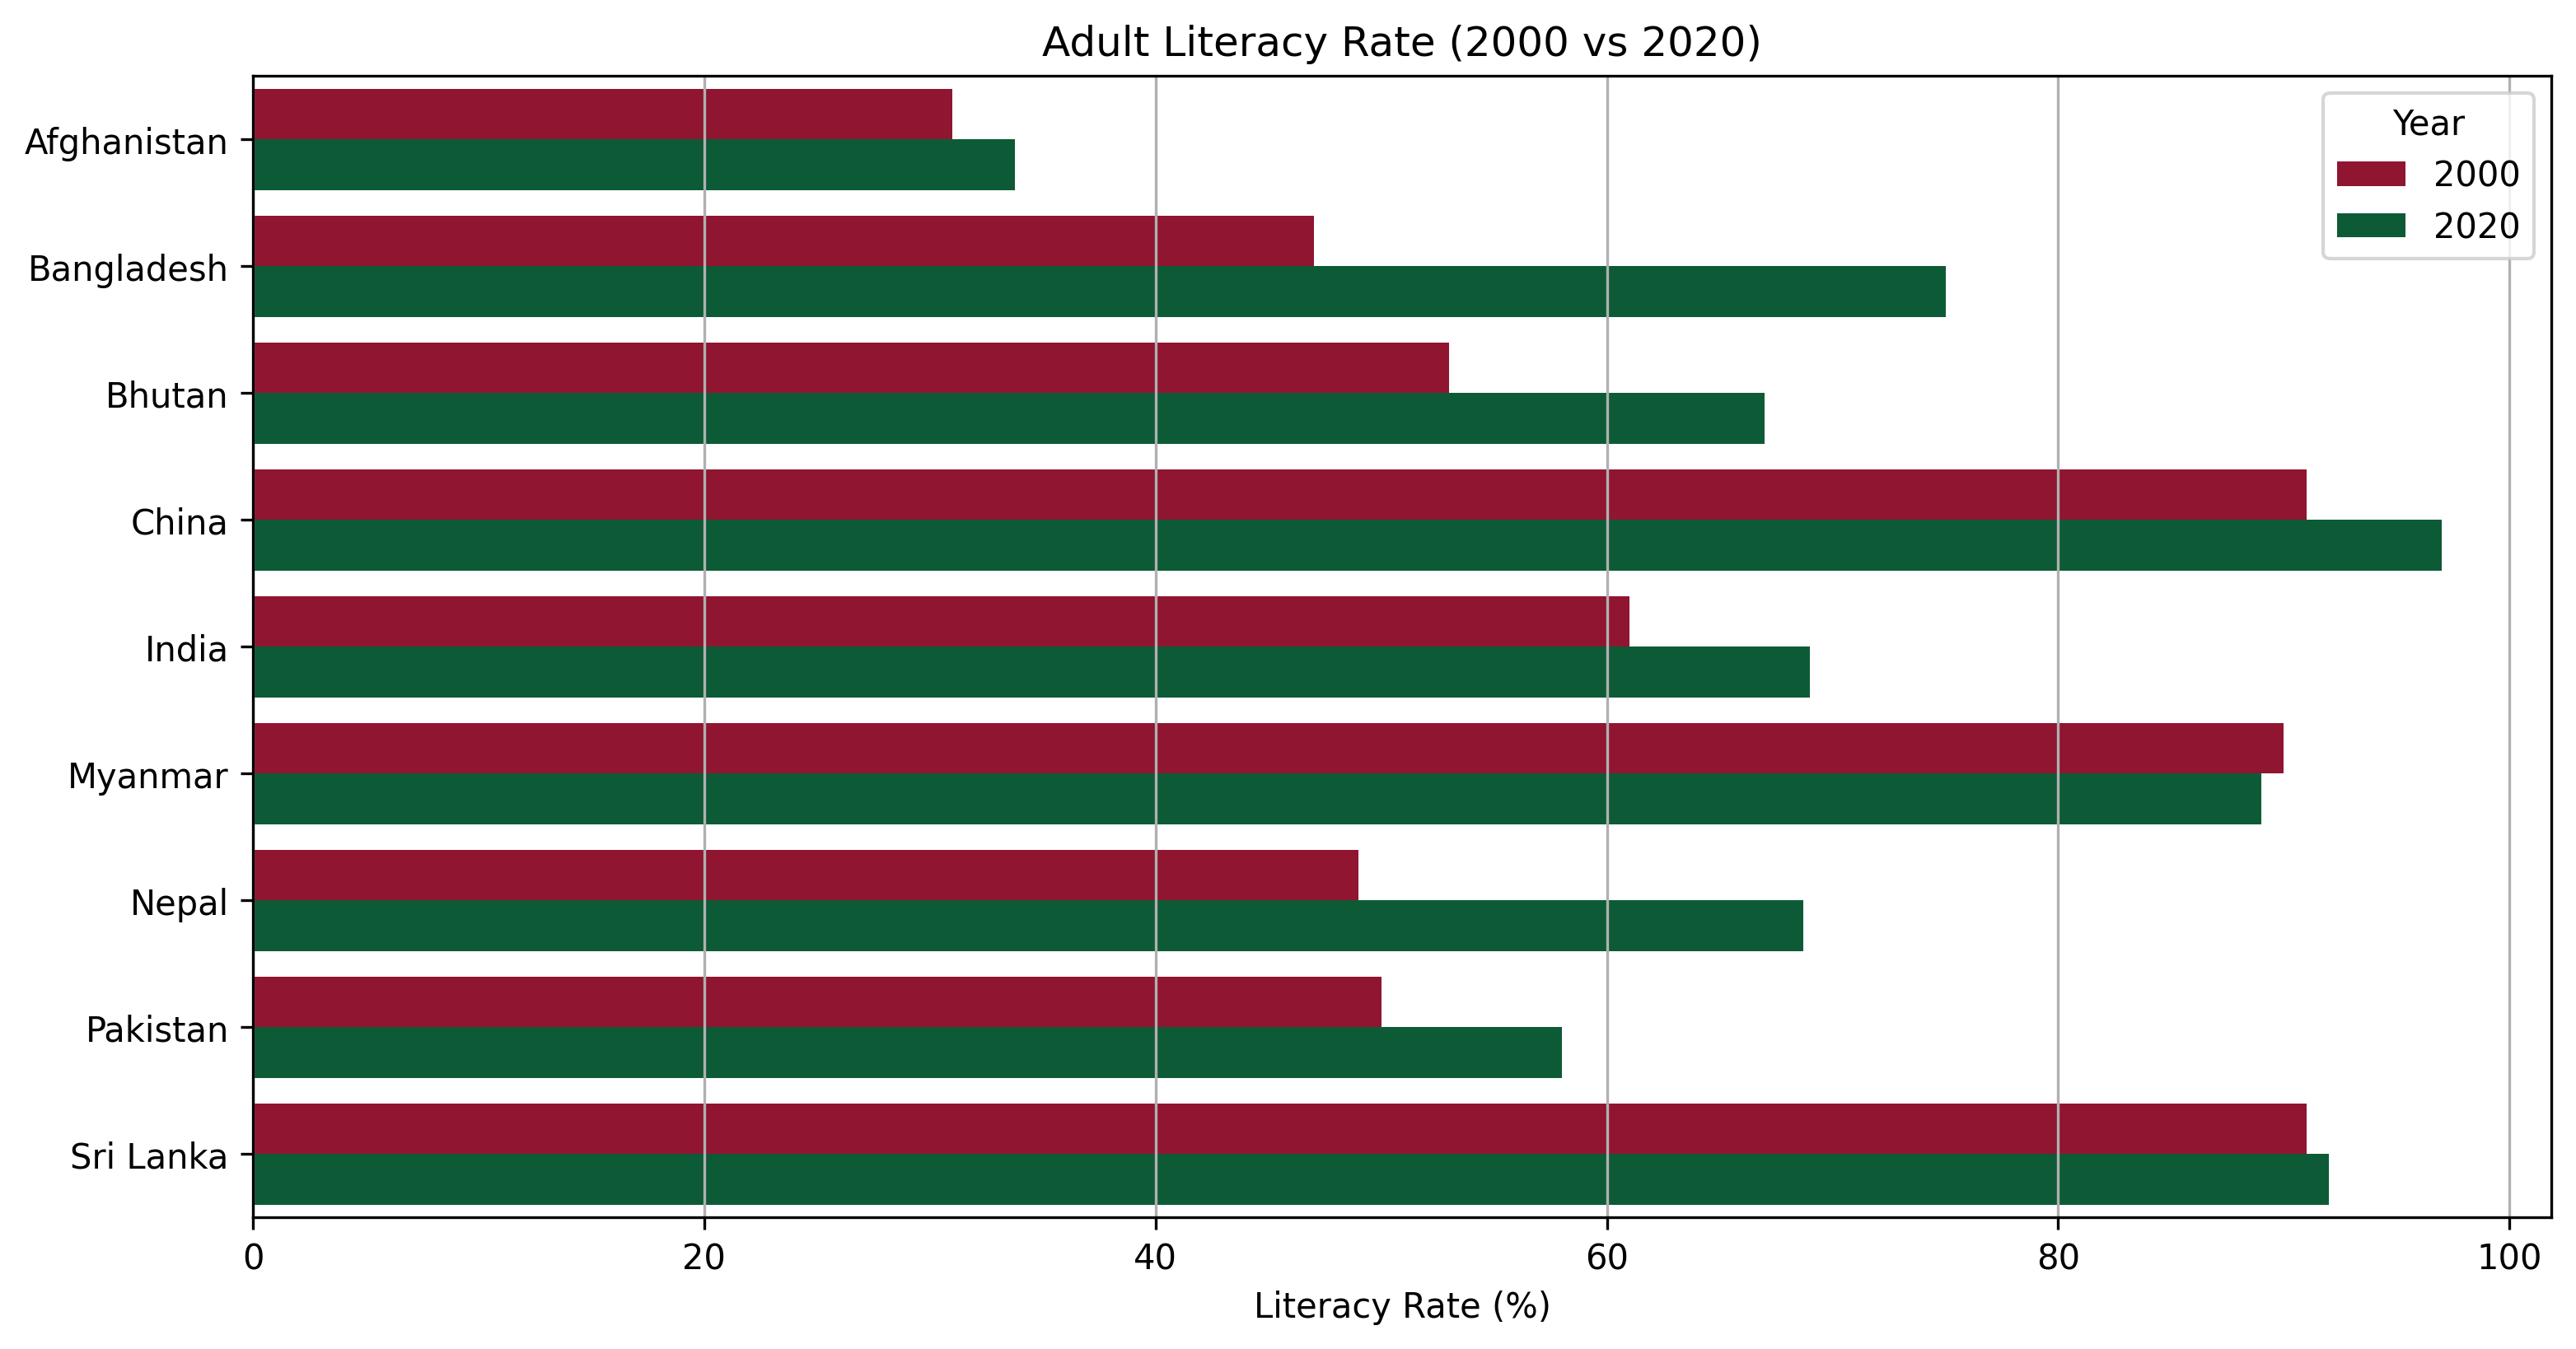

In [21]:
lit = df_final[
    (df_final['Indicator Name'] == 'Literacy rate, adult total (% of people ages 15 and above)') &
    (df_final['Year'].isin([2000, 2020]))
]

lit_pivot = lit.pivot(index='Country Name', columns='Year', values='Value').reset_index()

lit_melted = lit_pivot.melt(id_vars='Country Name', value_vars=[2000, 2020], 
                            var_name='Year', value_name='Literacy Rate')

plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(data=lit_melted, x='Literacy Rate', y='Country Name', hue='Year', palette='RdYlGn')

plt.title('Adult Literacy Rate (2000 vs 2020)')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('')
plt.grid(True, axis='x')
plt.legend(title='Year')
plt.show()

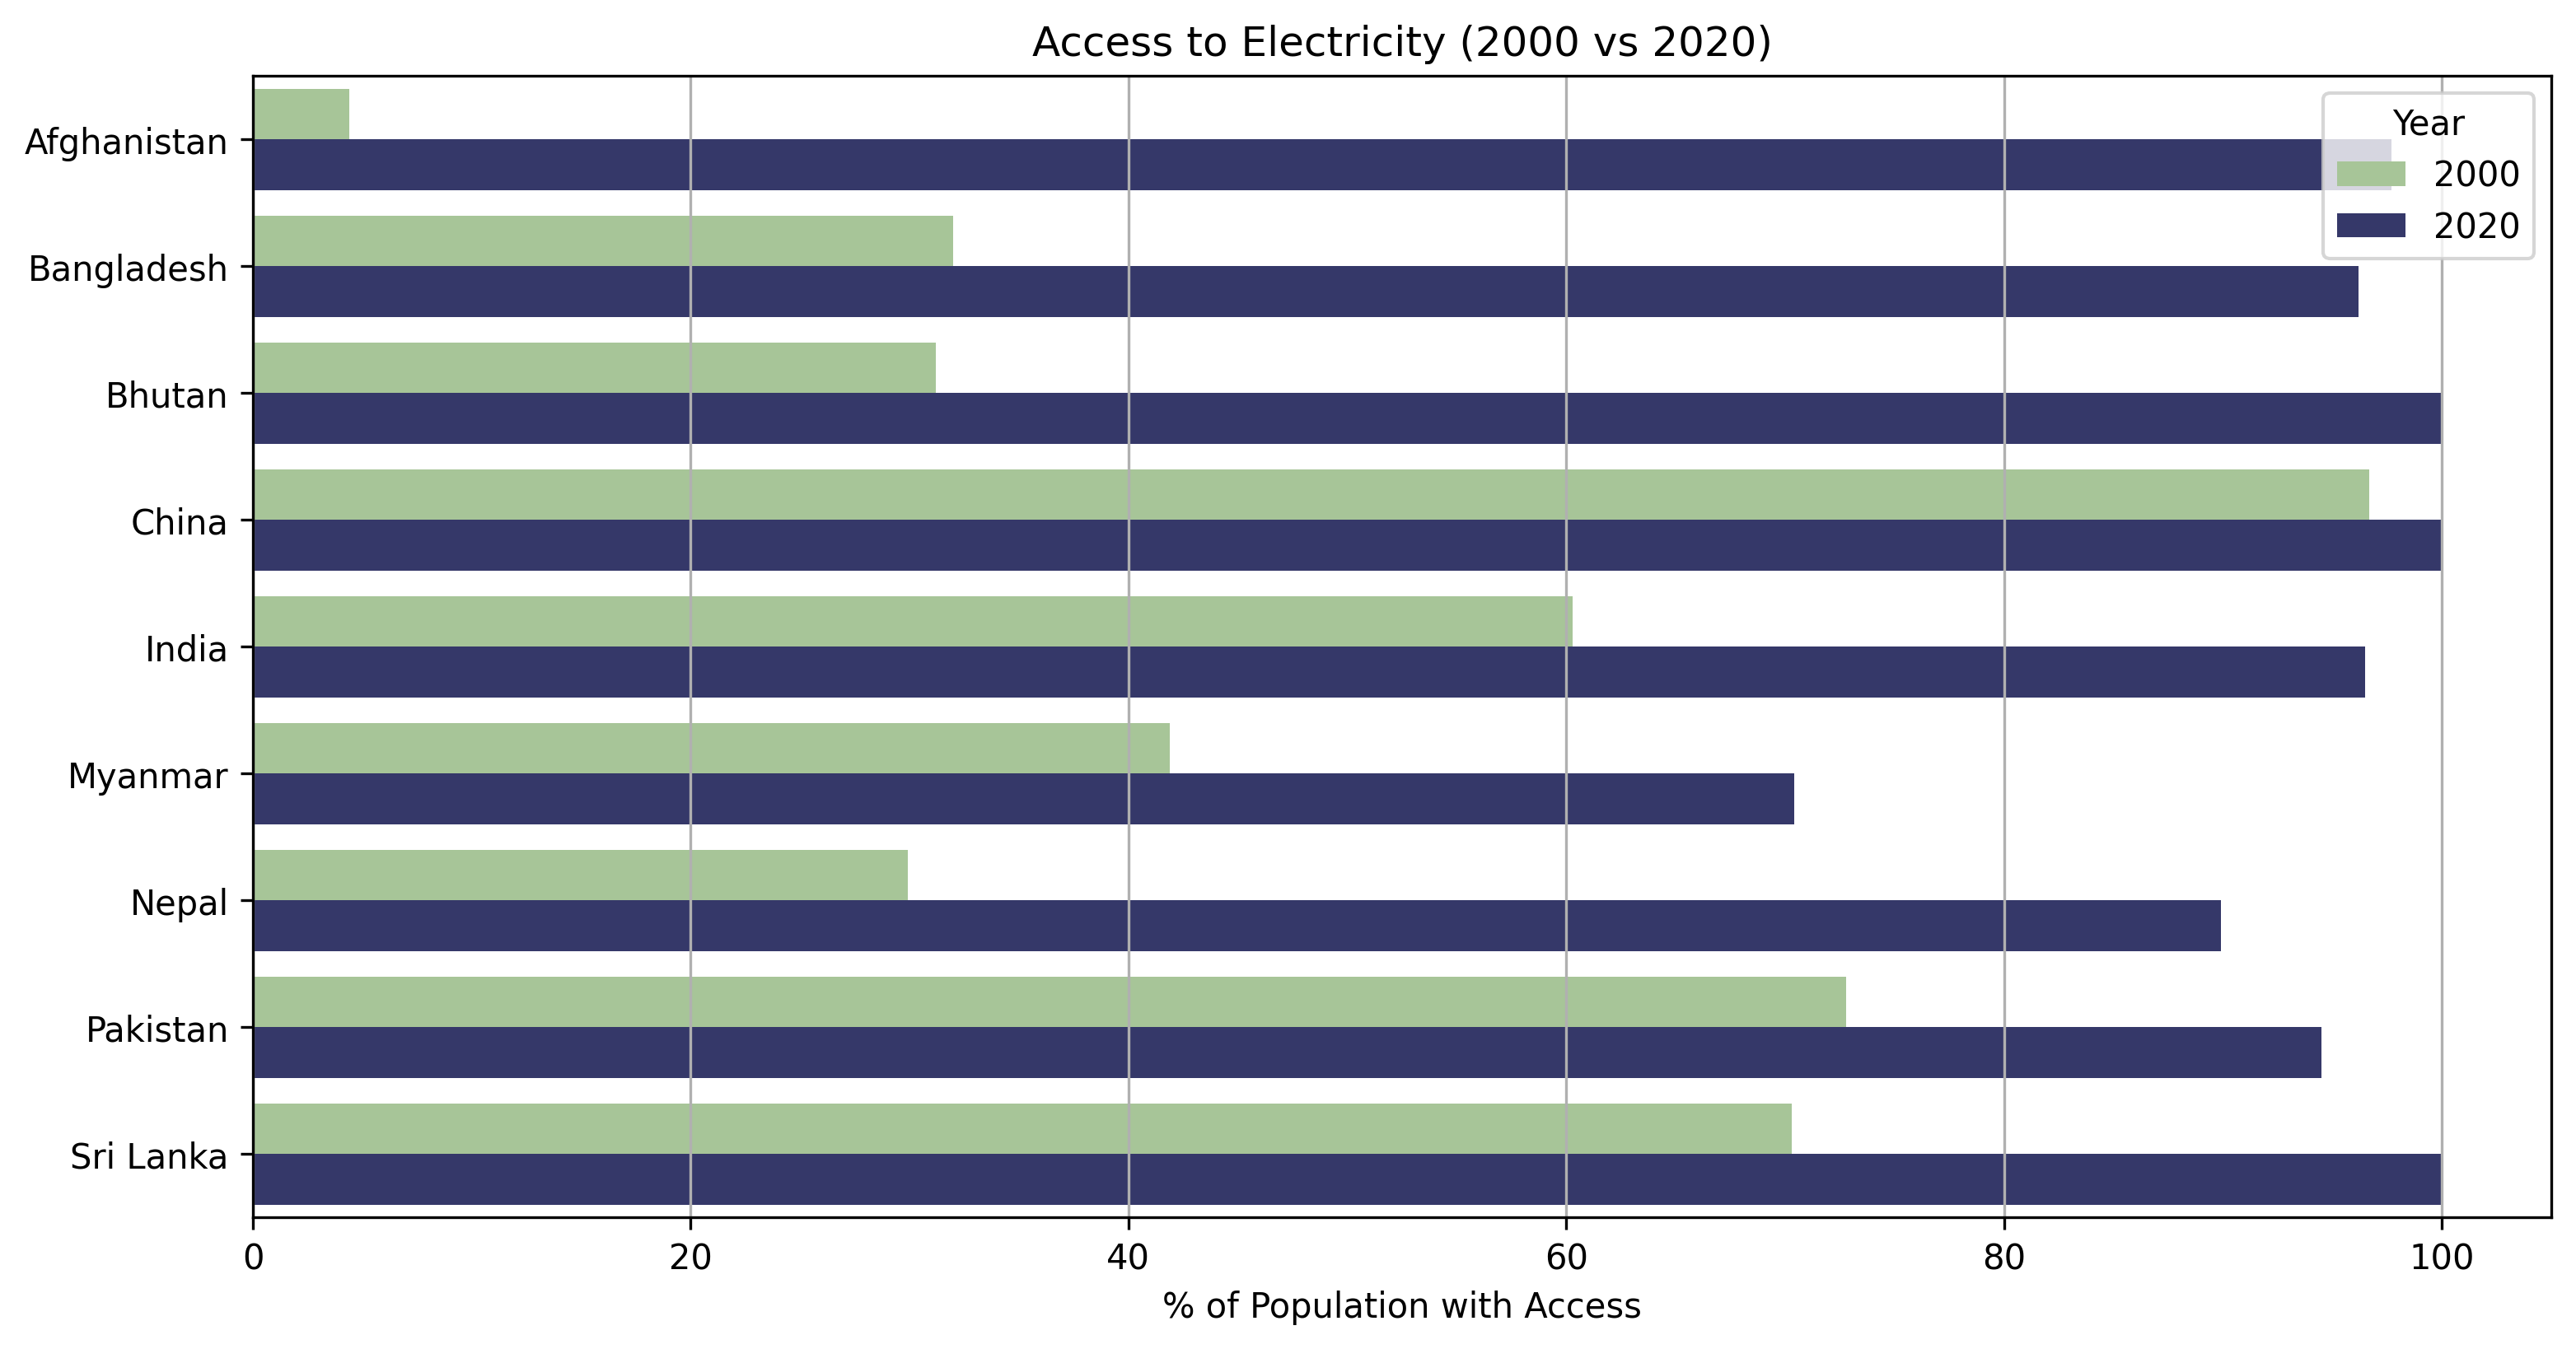

In [22]:
elec = df_final[
    (df_final['Indicator Name'] == 'Access to electricity (% of population)') &
    (df_final['Year'].isin([2000, 2020]))
]

elec_pivot = elec.pivot(index='Country Name', columns='Year', values='Value').reset_index()

elec_melted = elec_pivot.melt(id_vars='Country Name', value_vars=[2000, 2020], 
                              var_name='Year', value_name='Access to Electricity')

plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(data=elec_melted, x='Access to Electricity', y='Country Name', hue='Year', palette='crest')

plt.title('Access to Electricity (2000 vs 2020)')
plt.xlabel('% of Population with Access')
plt.ylabel('')
plt.grid(True, axis='x')
plt.legend(title='Year')
plt.show()

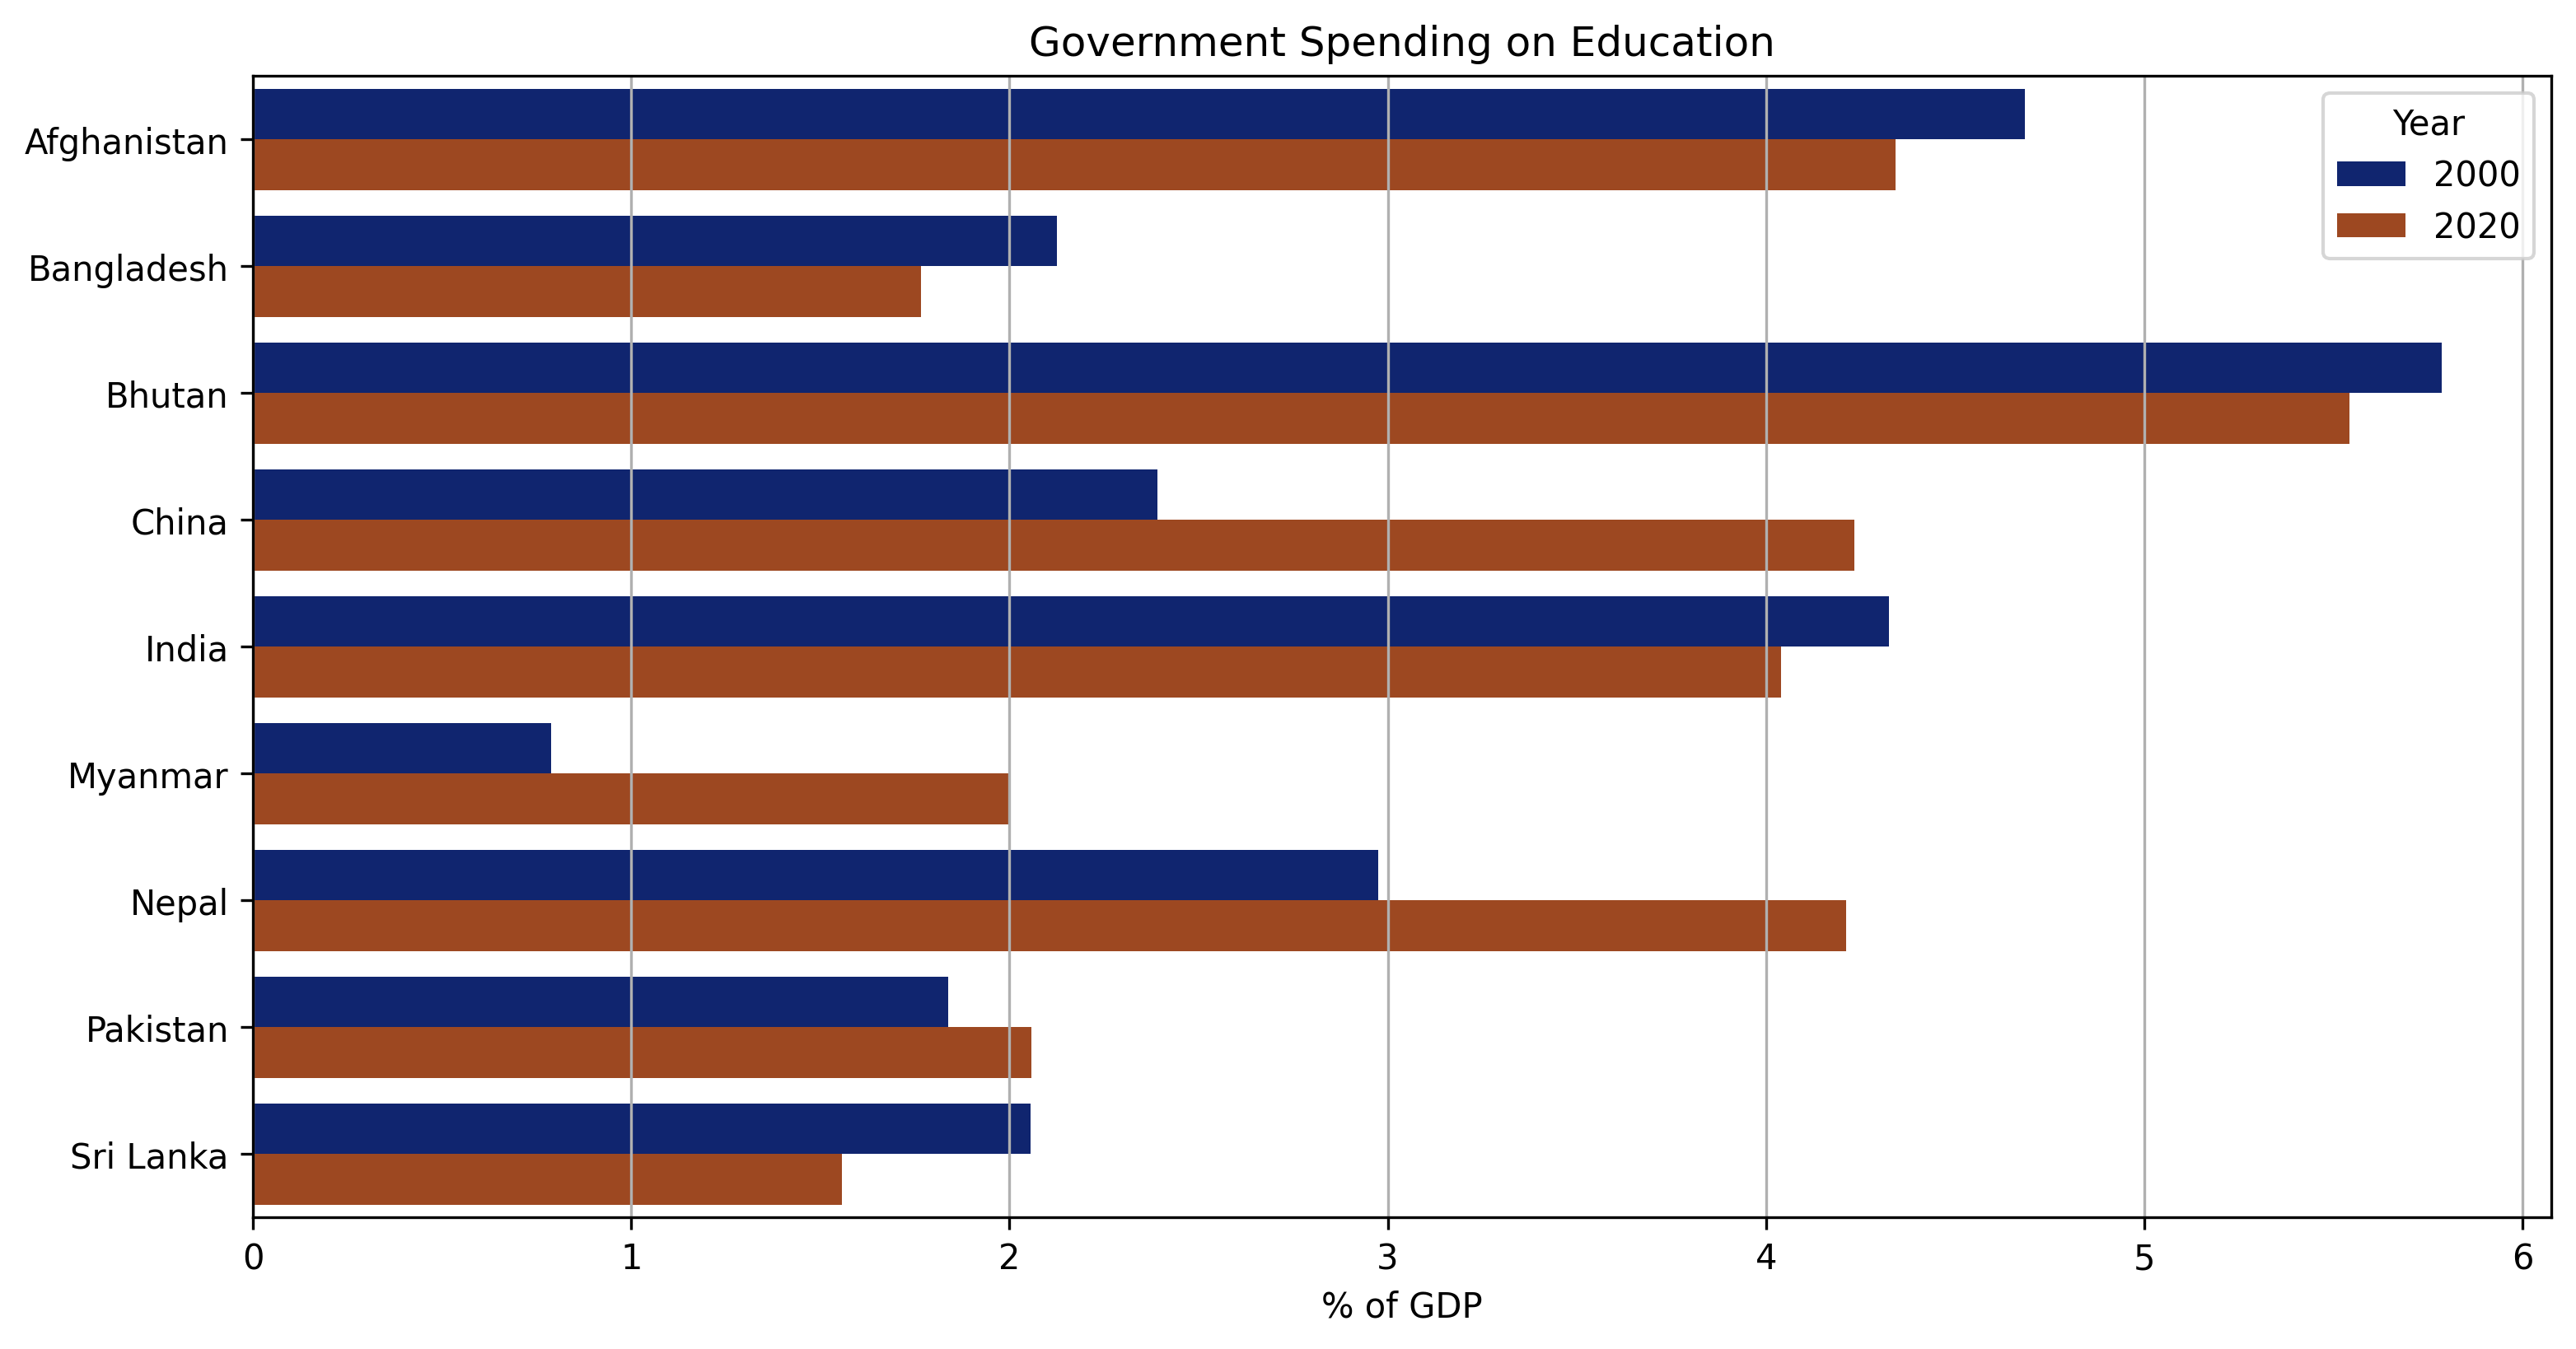

In [23]:
edu = df_final[
    (df_final['Indicator Name'] == 'Government expenditure on education, total (% of GDP)') &
    (df_final['Year'].isin([2000, 2020]))
]

edu_pivot = edu.pivot(index='Country Name', columns='Year', values='Value').reset_index()

edu_melted = edu_pivot.melt(id_vars='Country Name', value_vars=[2000, 2020], 
                            var_name='Year', value_name='Education Spending (% of GDP)')

plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(data=edu_melted, x='Education Spending (% of GDP)', y='Country Name', hue='Year', palette='dark')

plt.title('Government Spending on Education')
plt.xlabel('% of GDP')
plt.ylabel('')
plt.grid(True, axis='x')
plt.legend(title='Year')
plt.show()

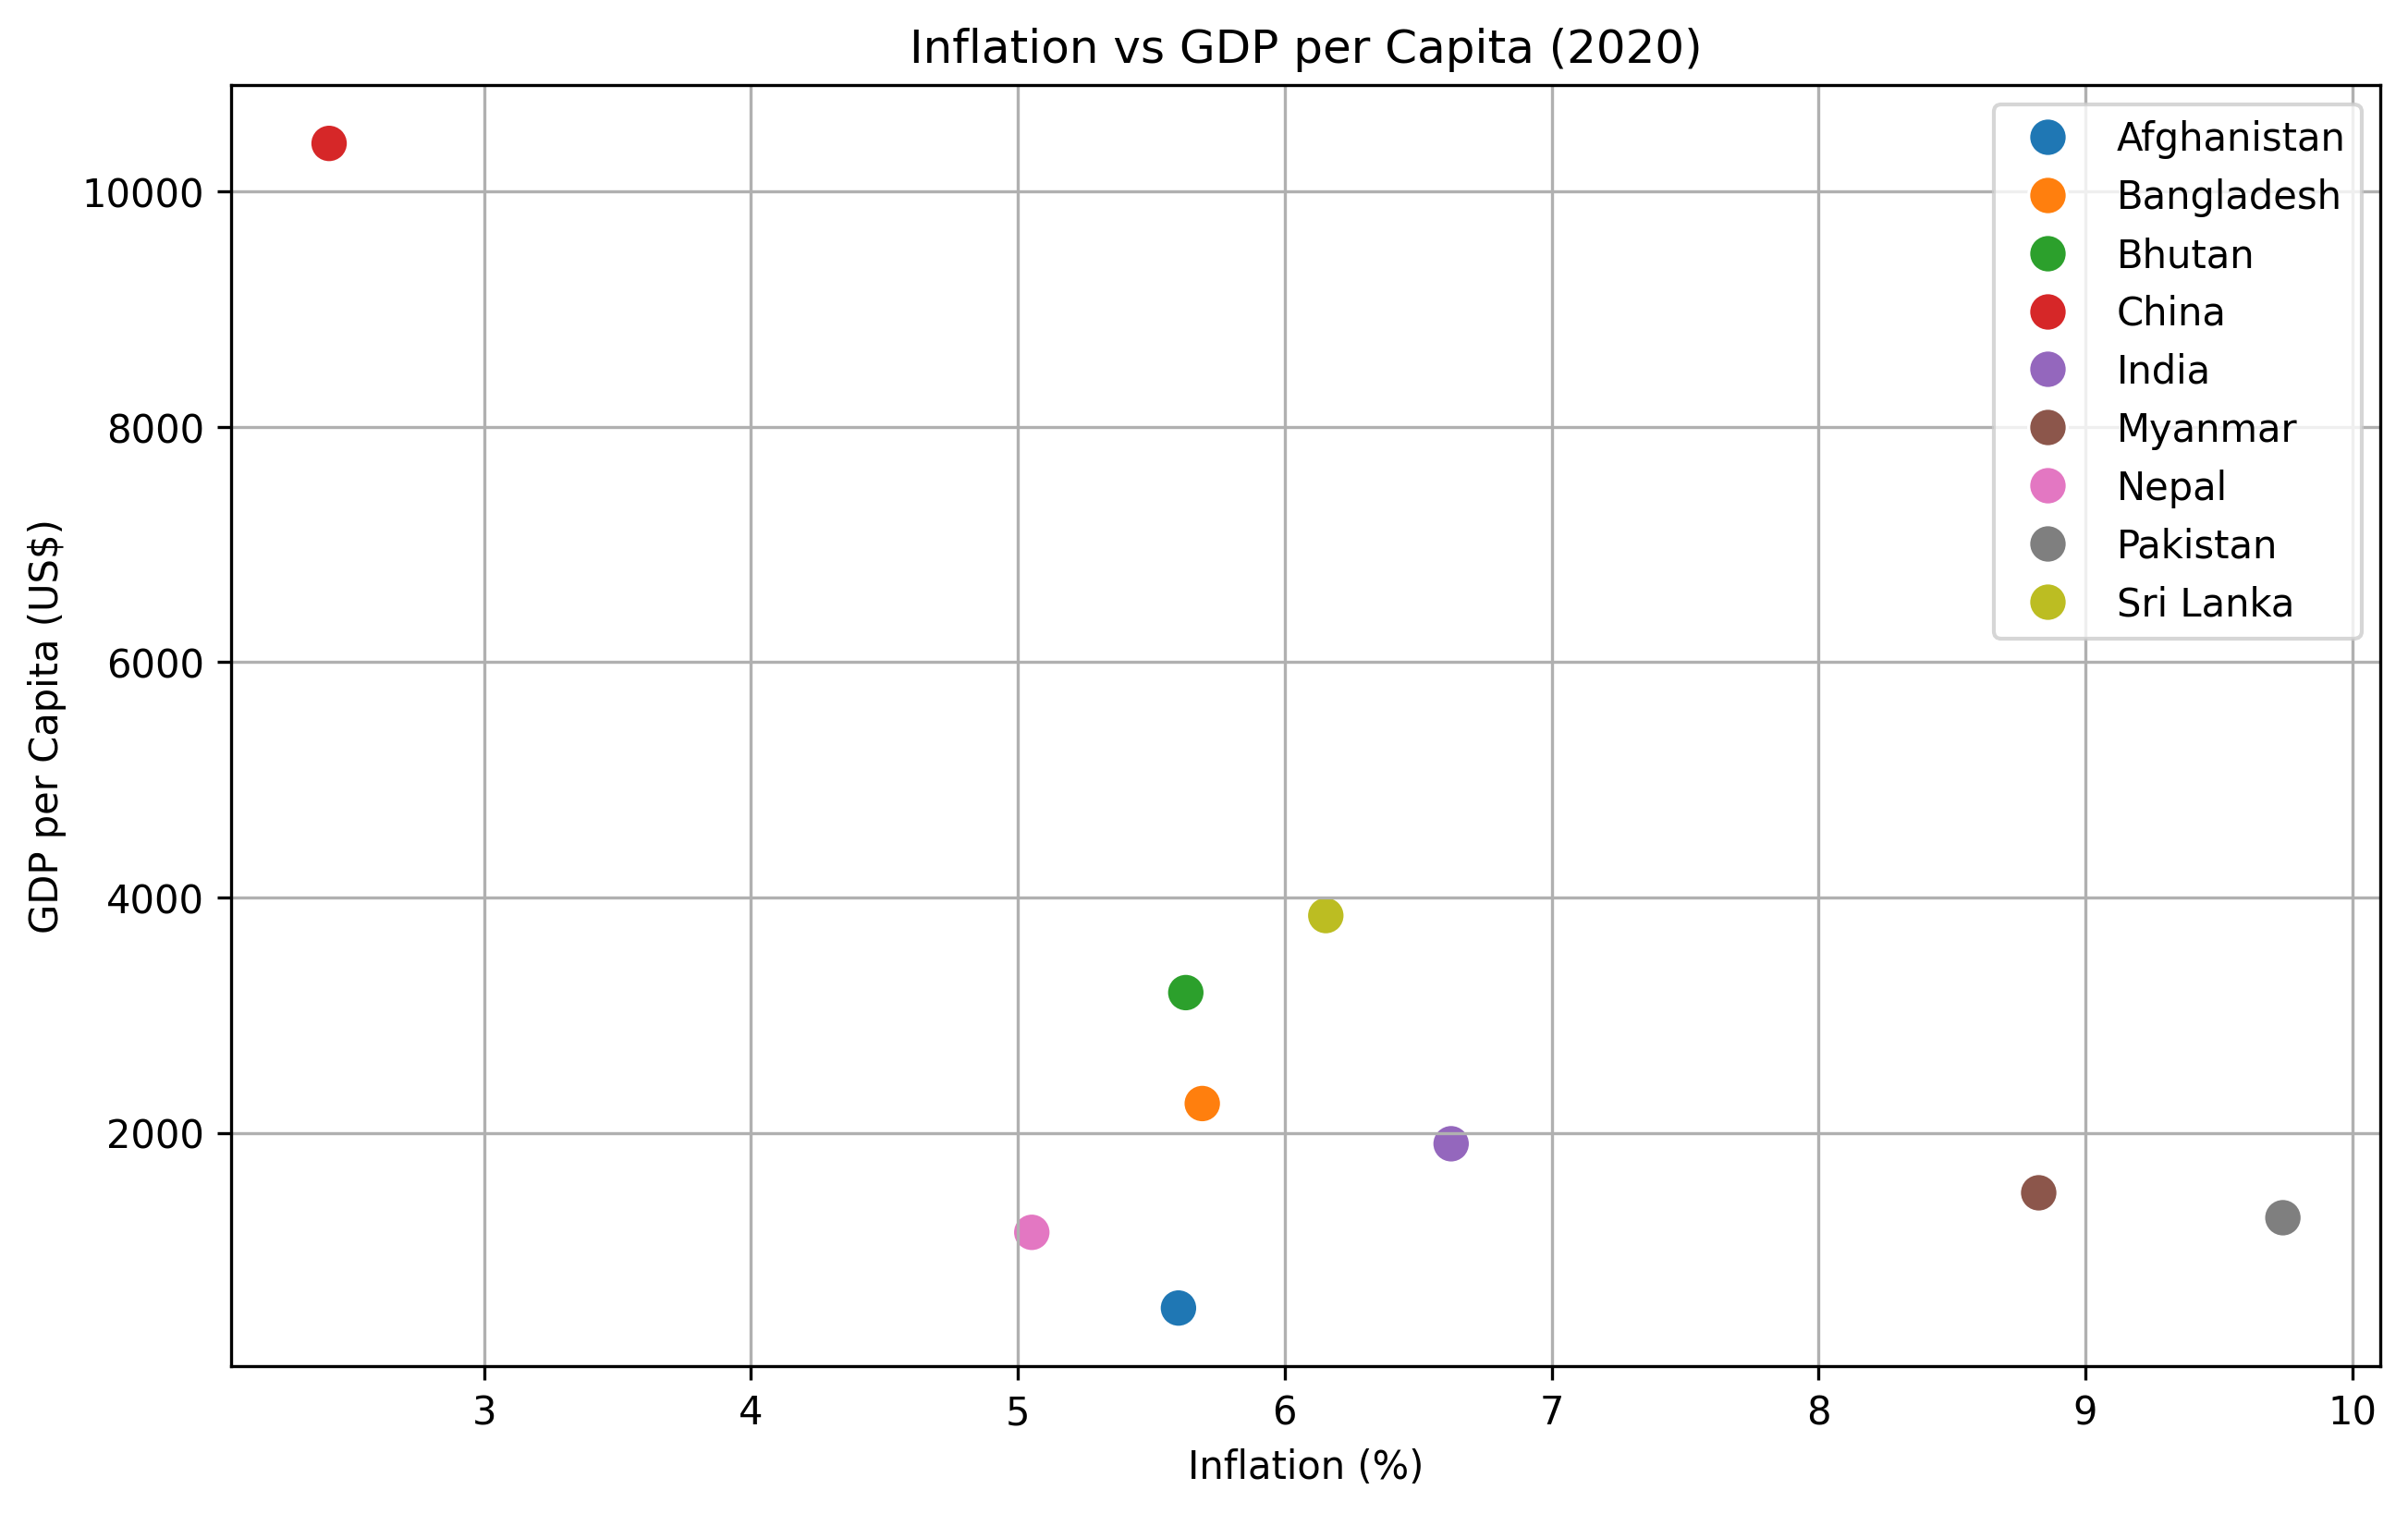

In [24]:
inflation = df_final[
    (df_final['Indicator Name'] == 'Inflation, consumer prices (annual %)') & 
    (df_final['Year'] == 2020)
]

gdp = df_final[
    (df_final['Indicator Name'] == 'GDP per capita (current US$)') & 
    (df_final['Year'] == 2020)
]

merged = pd.merge(
    inflation[['Country Name', 'Value']],
    gdp[['Country Name', 'Value']],
    on='Country Name',
    suffixes=('_inflation', '_gdp')
)

plt.figure(figsize=(10, 6), dpi=300)
sns.scatterplot(data=merged, x='Value_inflation', y='Value_gdp', hue='Country Name', s=100)
plt.title('Inflation vs GDP per Capita (2020)')
plt.xlabel('Inflation (%)')
plt.ylabel('GDP per Capita (US$)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

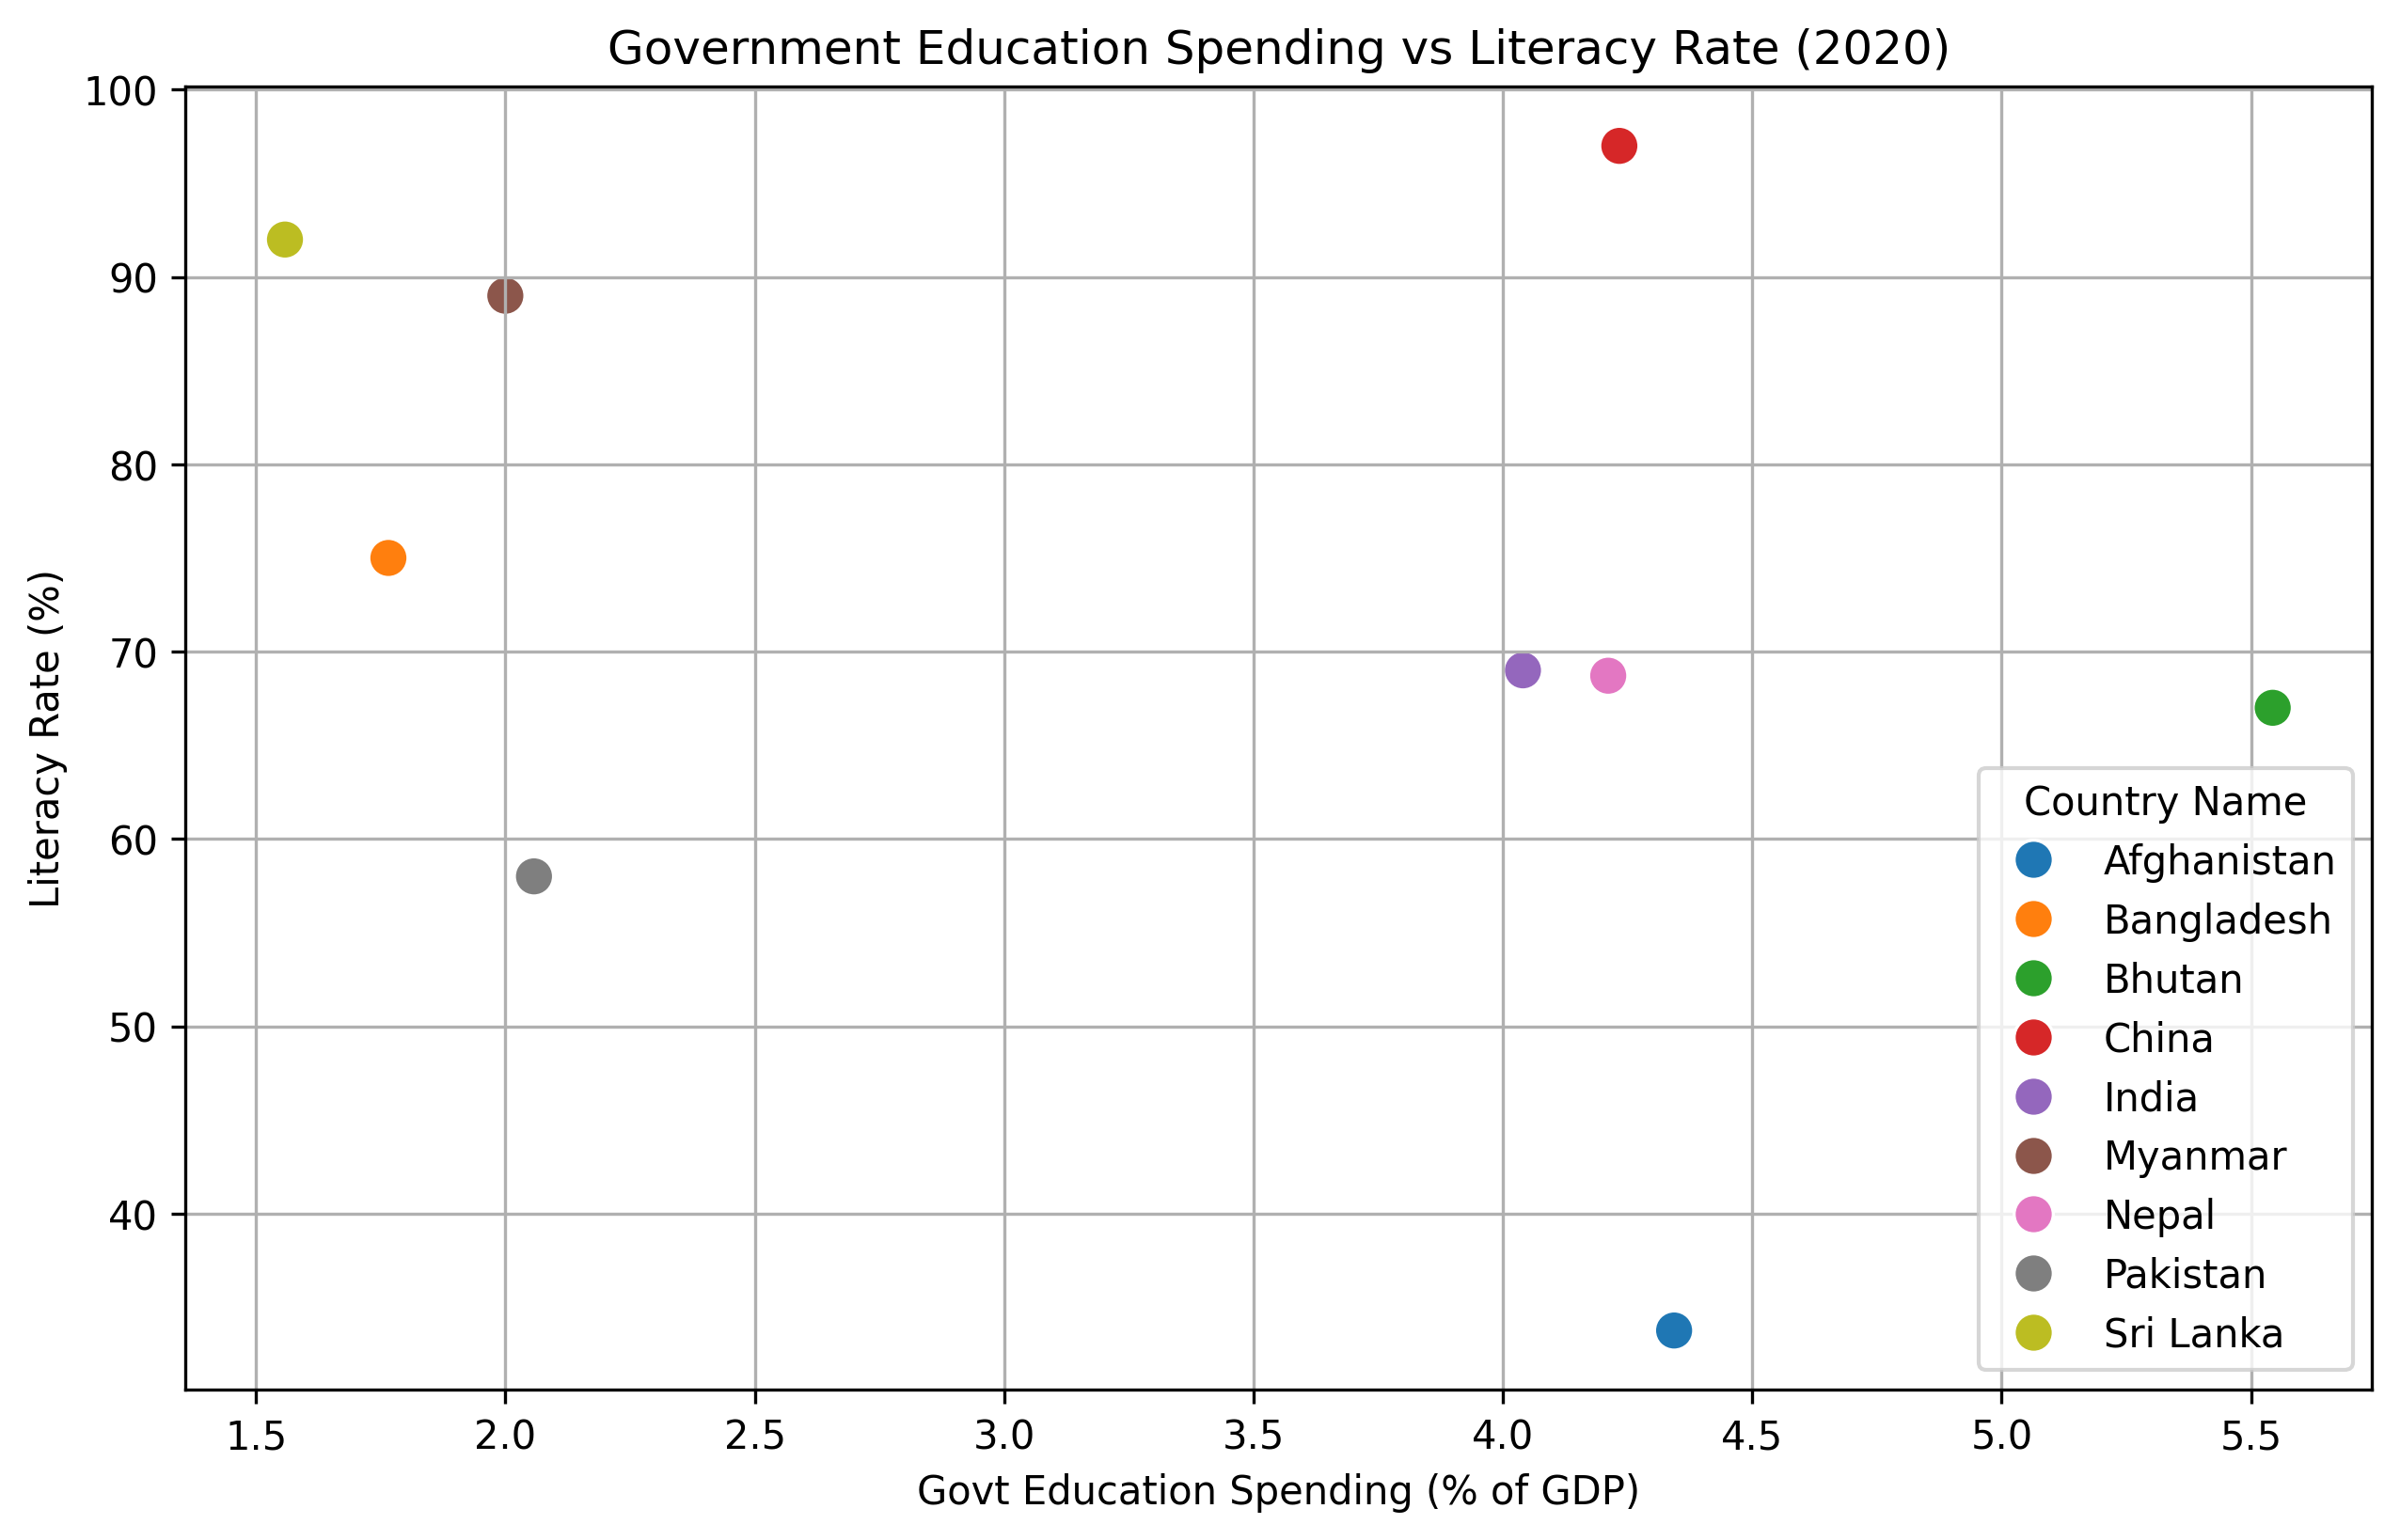

In [25]:
edu_2020 = df_final[
    (df_final['Indicator Name'] == 'Government expenditure on education, total (% of GDP)') & (df_final['Year'] == 2020)
]
lit_2020 = df_final[
    (df_final['Indicator Name'] == 'Literacy rate, adult total (% of people ages 15 and above)') & (df_final['Year'] == 2020)
]

merged2 = pd.merge(
    lit_2020[['Country Name', 'Value']],
    edu_2020[['Country Name', 'Value']],
    on='Country Name',
    suffixes=('_lit', '_edu')
)

plt.figure(figsize=(10,6), dpi=300)
sns.scatterplot(data=merged2, x='Value_edu', y='Value_lit', hue='Country Name', s=100)
plt.title('Government Education Spending vs Literacy Rate (2020)')
plt.xlabel('Govt Education Spending (% of GDP)')
plt.ylabel('Literacy Rate (%)')
plt.grid(True)
plt.show()

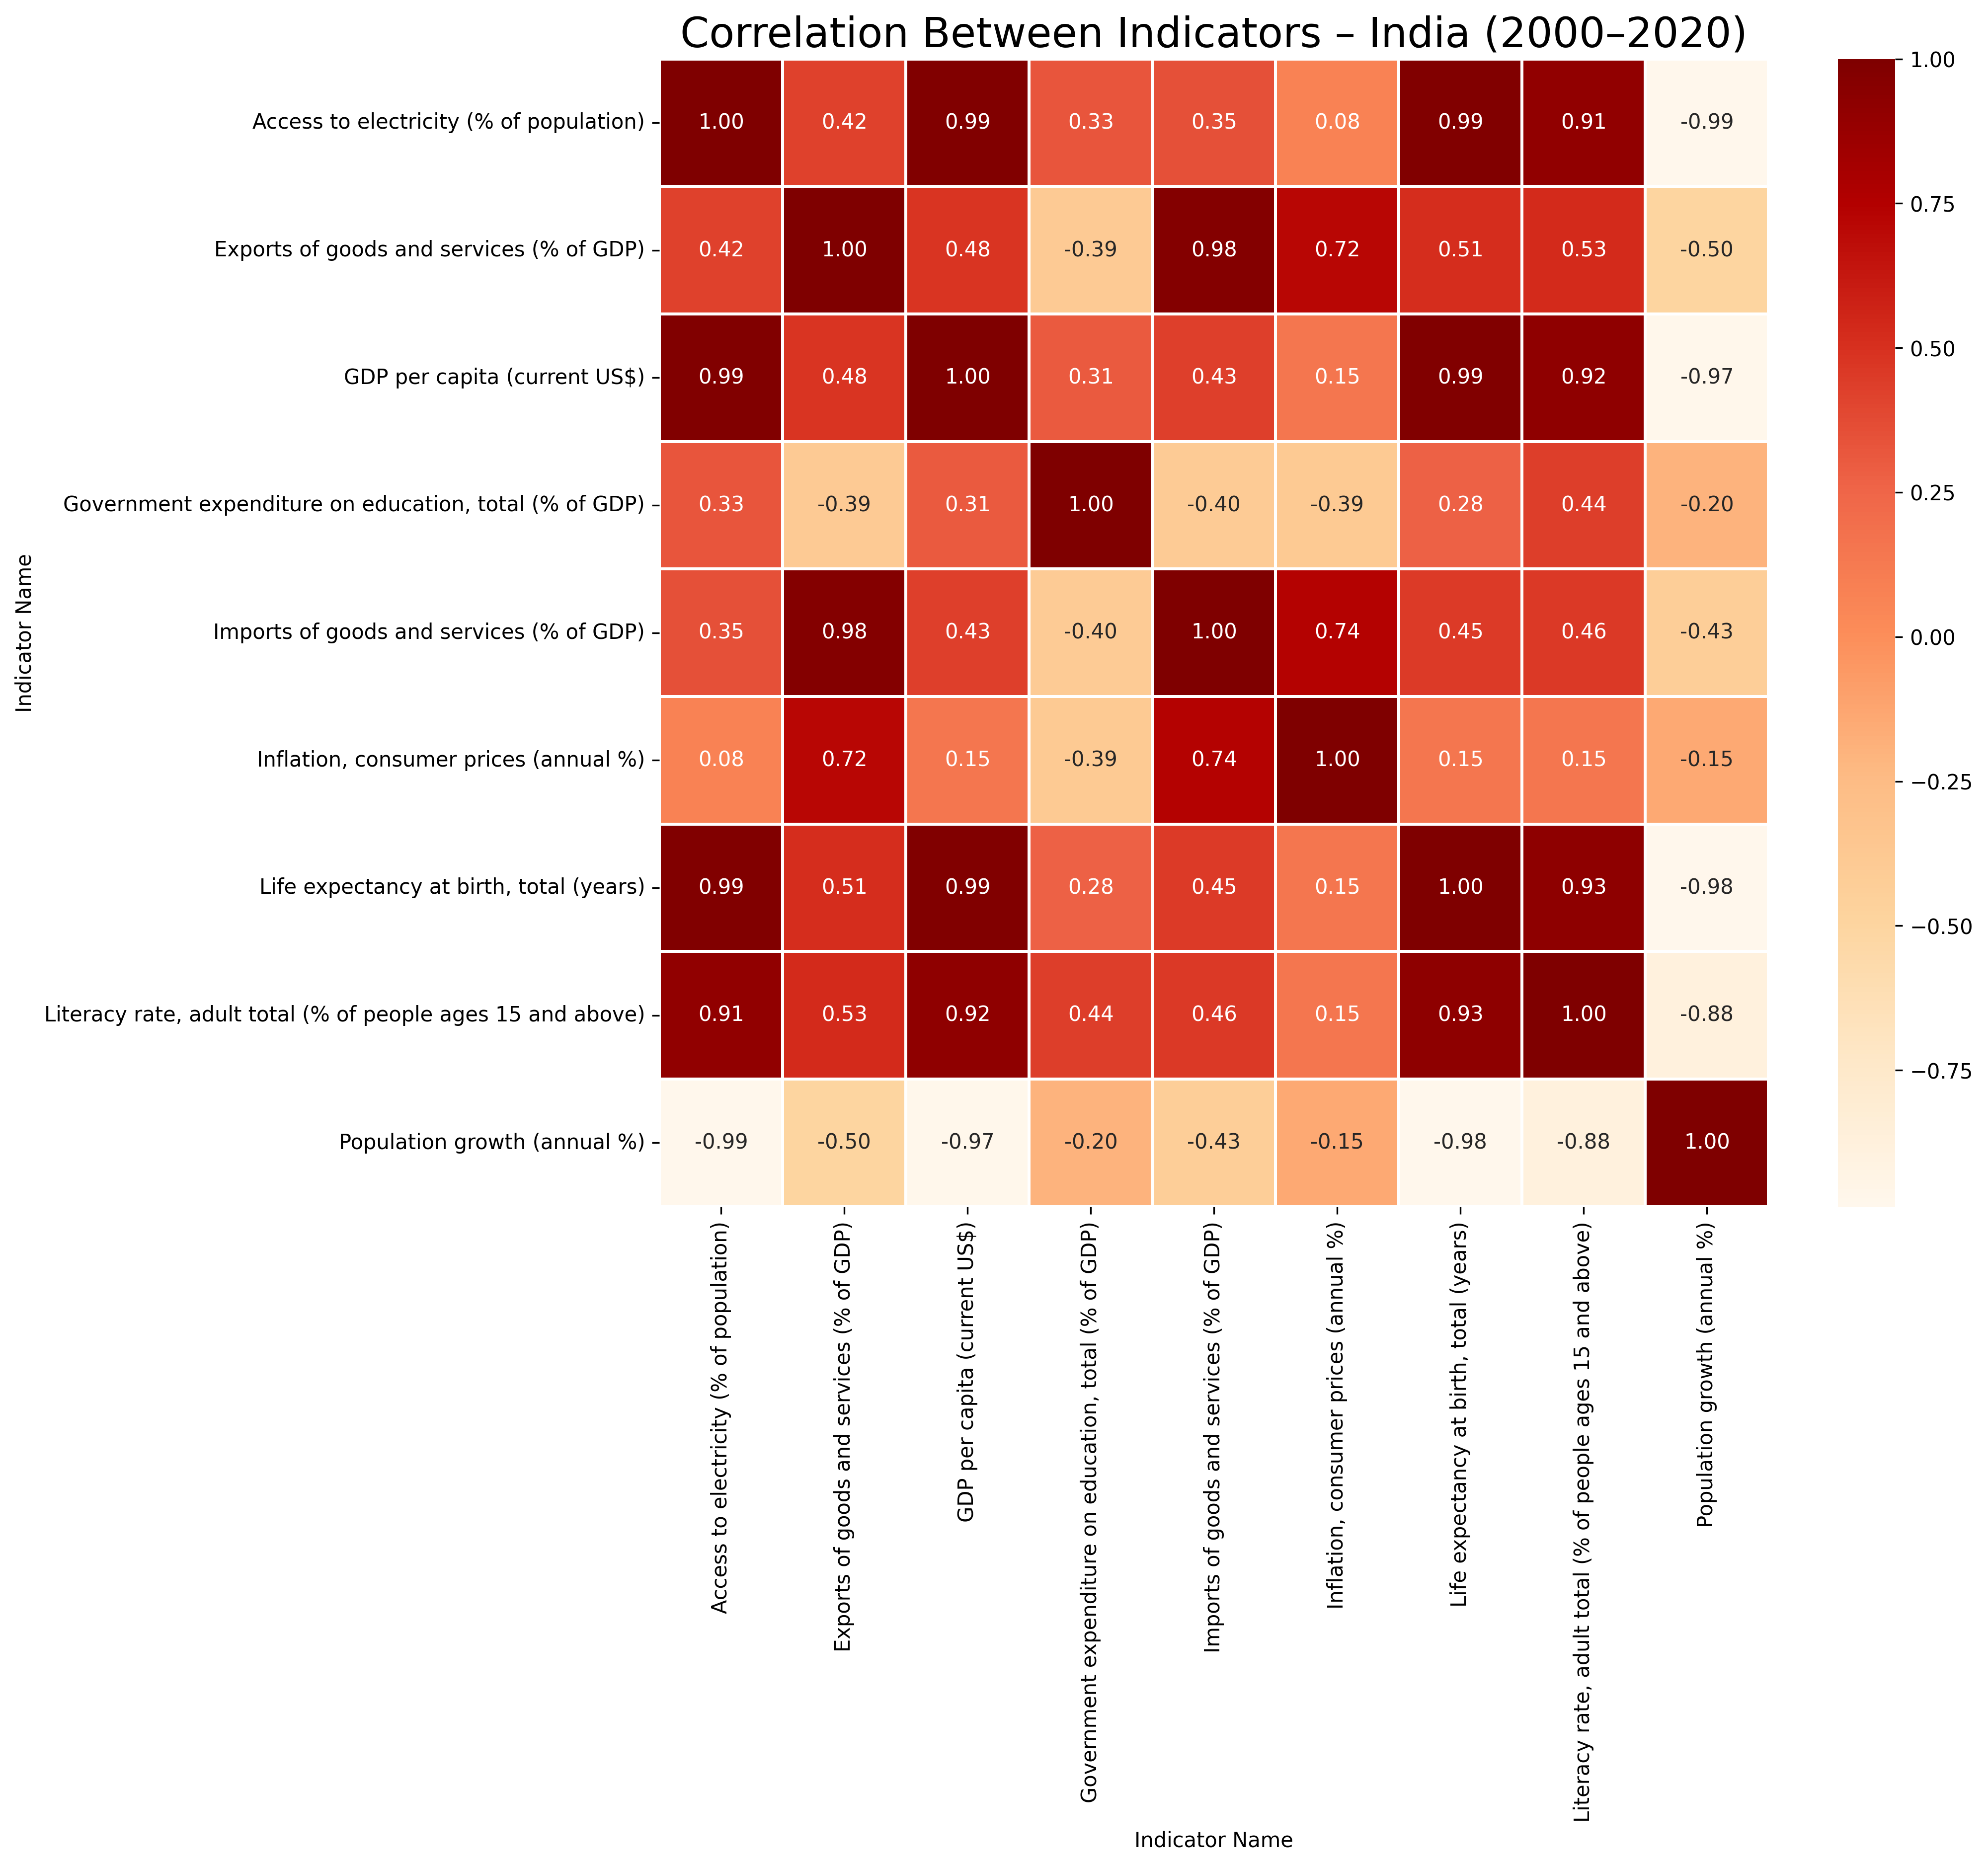

In [26]:
india = df_final[df_final['Country Name'] == 'India']

india_wide = india.pivot(index='Year', columns='Indicator Name', values='Value')

corr = india_wide.corr()

plt.figure(figsize=(12, 10), dpi=300)
sns.heatmap(corr, annot=True, cmap='OrRd', fmt=".2f", linewidths=1)
plt.title('Correlation Between Indicators – India (2000–2020)', size=20)
plt.show()

In [27]:
df_final.to_csv('data.csv', index=False)